Group member name:
- Ryan Feinberg
- Anh Nguyen

Name: TODO

Development environment (Colab or local): TODO

# Deep Learning Analysis

- **Tasks:**
  1. Compare the performance of a small CNN (LeNet-5) with the results you got for PCA, LDA, and SVM using the Olivetti faces dataset
  2. Choose, implement (if not available in a library),  and run a baseline for the IMDB text classification from lecture
    - Consider what techniques would be appropriate for this task.
    - Also consider the fact that this is a text dataset, so some techniques might not work well or may be cumbersome to engineer.
    - Include a description of your baseline and explain why this baseline makes sense for this problem.
  3. Run a vanilla RNN on the IMDB text classification dataset and compare its performance against your baseline.
  4. Explore data augmentation techniques for both tasks.
    - For the image task, you may use the built-in Keras data augmentation function (tf.keras.preprocessing.image.ImageDataGenerator).
    - For the text task, you may find an external function that you import or write your own data augmentation.
    - Describe what data augmentation methods you used and the motivation behind them (why you think they'll help).

_Where it is relevant, make sure you follow deep learning best practices discussed in class. In particular, performing a hyperparameter search and setting up an proper train, dev, and test framework for evaluating hyperparameters and your final selected model._

- Evaluation scenarios:
  1. Facial Recognition
    - Use 20% of the images for training and 80% for testing
    - Use 50% of the images for training and 50% for testing
    - Use 80% of the images for training and 20% for testing
    - Always use the first K images per person for training, and the remaining ones for testing (see data split code below)
    - Plot CMC curve and confusion matrix for each combination of scenario

  2. Review Text Classification
    - Use 2,000 examples for training and 2,000 examples for testing (smaller than the example in lecture)
    - Experiment with several RNN configurations
    - Plot the training and validation plots for your RNN and for your baseline if your baseline has a training phase.
    - Plot a confusion matrix of the predictions.

- Discussion:
  1. Facial Recognition
    - Is LeNet-5 better than PCA/LDA/SVM?
    - Is there a clear difference in performance for different train/test data splits?
    - Does data augmentation improve the results?
  
  2. Review Text Classification
    - Is the vanilla RNN better than a simple baseline?
    - How sensitive is the RNN performance to hyperparameter selection?
    - Does data augmentation improve the results? More or less than for the facial recognition task? What properties of the two tasks do you think is leading to the data augmentation effects you are seeing?

## Olivetti faces dataset (AT&T Laboratories Cambridge)

As described on the original website:

"*There are ten different images of each of 40 distinct subjects. For some subjects, the images were taken at different times, varying the lighting, facial expressions (open / closed eyes, smiling / not smiling) and facial details (glasses / no glasses). All the images were taken against a dark homogeneous background with the subjects in an upright, frontal position (with tolerance for some side movement).*"

The original dataset consisted of 92 x 112, while the version available here consists of 64x64 images.

- Classes: 40
- Samples per class: 10
- Samples total: 400
- Dimensionality: 4096 (64x64 pixels)
- Pixel values: real, between 0 and 1


In [ ]:
from sklearn.datasets import fetch_olivetti_faces
from google.colab.patches import cv2_imshow
import numpy as np

from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set()

# Get the dataset

In [ ]:
faces = fetch_olivetti_faces()

_, img_height, img_width = faces.images.shape

print(faces.images.shape)

(400, 64, 64)


# Split the dataset

In [ ]:
N_IDENTITIES = len(np.unique(faces.target)) # how many different individuals are in the dataset
GALLERY_SIZE = 5                            # use the first GALLERY_SIZE images per individual for training, the rest for testing

gallery_indices = []
probe_indices = []
for i in range(N_IDENTITIES):
  indices = list(np.where(faces.target == i)[0])
  gallery_indices += indices[:GALLERY_SIZE]
  probe_indices += indices[GALLERY_SIZE:]

x_train = faces.images[gallery_indices].reshape(-1, img_height, img_width, 1)
y_train = faces.target[gallery_indices]
x_test = faces.images[probe_indices].reshape(-1, img_height, img_width, 1)
y_test = faces.target[probe_indices]

print(x_train.shape, x_test.shape)

(200, 64, 64, 1) (200, 64, 64, 1)


# Visualize the splits

In [ ]:
def show_images(imgs, num_rows, num_cols):
  assert len(imgs) == num_rows*num_cols

  for i in range(num_rows):
    row = None
    for j in range(num_cols):
      if row is None:
        row = imgs[i*num_cols+j].reshape(img_height, img_width)*255.0
      else:
        row = np.concatenate((row, imgs[i*num_cols+j].reshape(img_height, img_width)*255.0), axis=1)
    cv2_imshow(row)

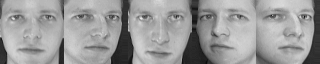

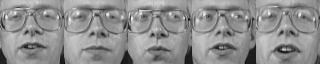

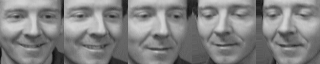

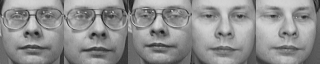

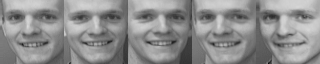

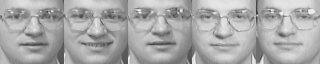

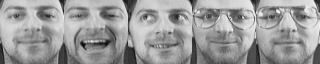

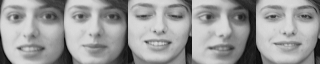

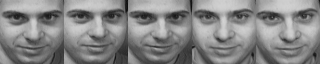

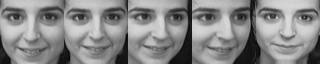

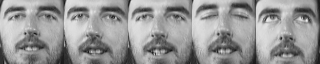

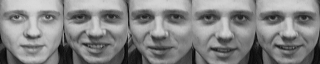

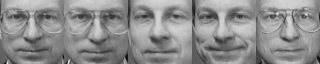

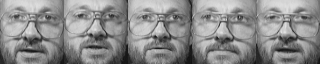

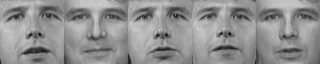

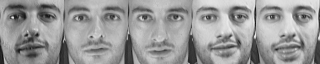

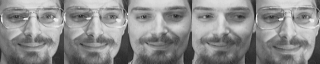

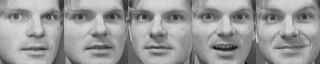

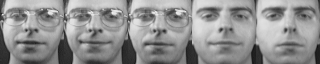

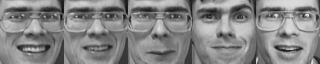

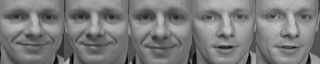

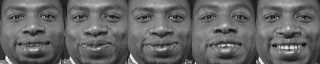

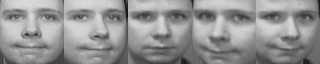

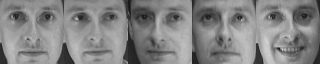

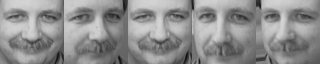

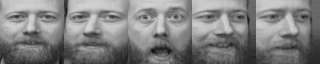

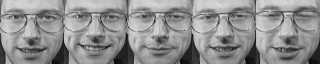

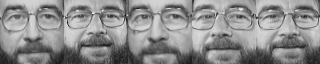

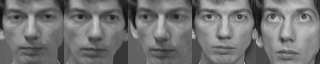

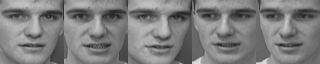

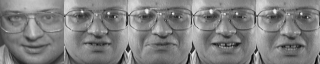

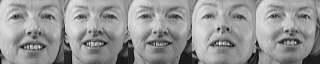

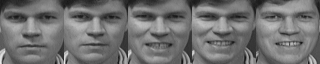

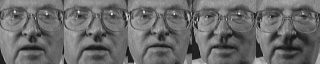

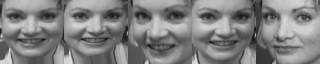

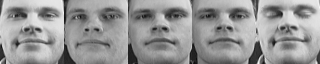

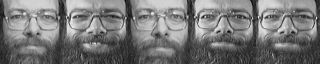

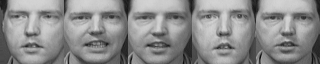

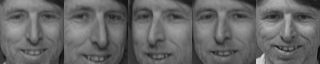

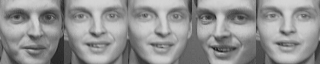

In [ ]:
show_images(x_train, N_IDENTITIES, GALLERY_SIZE)

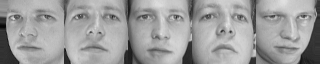

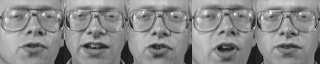

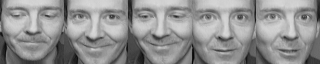

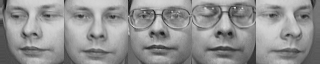

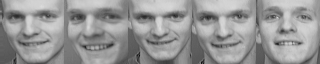

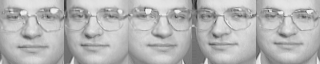

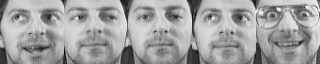

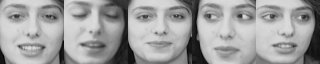

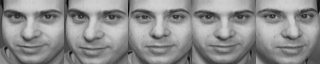

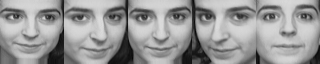

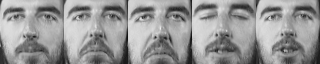

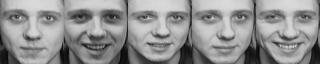

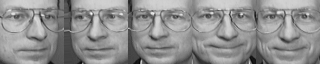

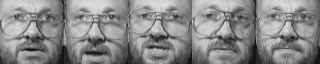

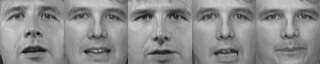

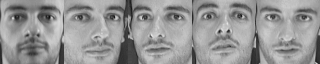

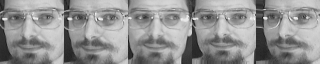

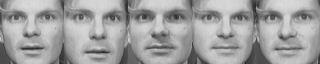

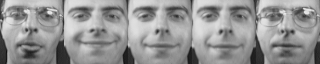

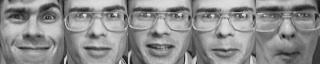

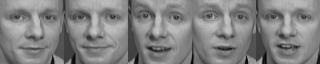

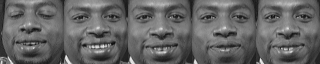

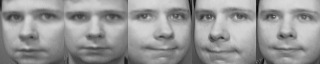

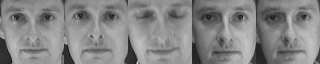

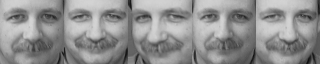

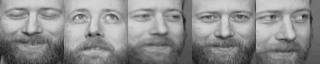

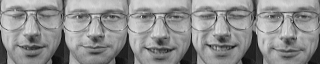

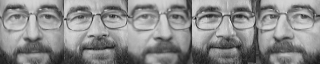

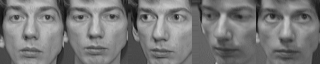

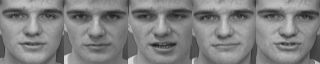

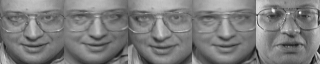

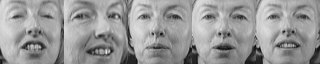

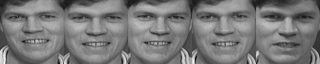

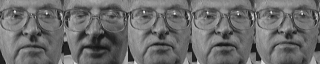

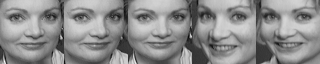

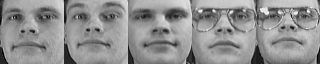

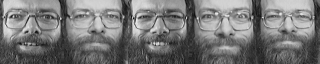

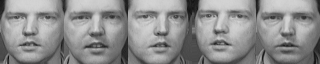

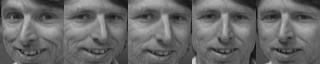

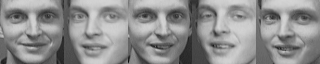

In [ ]:
show_images(x_test, N_IDENTITIES, 10 - GALLERY_SIZE)

# **20% training, 80% testing**


In [ ]:
N_IDENTITIES = len(np.unique(faces.target)) # how many different individuals are in the dataset
GALLERY_SIZE = 2                            # use the first GALLERY_SIZE images per individual for training, the rest for testing

gallery_indices = []
probe_indices = []
for i in range(N_IDENTITIES):
  indices = list(np.where(faces.target == i)[0])
  gallery_indices += indices[:GALLERY_SIZE]
  probe_indices += indices[GALLERY_SIZE:]

x_train = faces.images[gallery_indices].reshape(-1, img_height*img_width) # vectorize train images
y_train = faces.target[gallery_indices]
x_test = faces.images[probe_indices].reshape(-1, img_height*img_width)    # vectorize test images
y_test = faces.target[probe_indices]

print(x_train.shape, x_test.shape)

(80, 4096) (320, 4096)


In [ ]:
print(np.unique(y_train, return_counts=True))

print(np.unique(y_test, return_counts=True))

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39]), array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]))
(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39]), array([8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8]))


## **Baseline Implementation**

Explaination:

I choose Naive Bayes to implement my baseline due to its simplicity, computational efficiency, and probability framework. Naive Bayes assumes independence among features, allowing for fast training and predictions on datasets of varying sizes. This algorithm does not required additional hyperparameters. In conclusion, Naive Bayes is well-suited as a baseline for facial recognition.

In [ ]:
# Baseline: Gaussian Naive Bayes
nb_model = GaussianNB()
nb_model.fit(x_train, y_train)
y_predicted = nb_model.predict(x_test)

tests = x_test.shape[0]
print("Naive Bayes Total Tests: ", tests)

failed = (y_test != y_predicted).sum()
print("Naive Bayes Failed Predictions: ", failed)

print("Naive Bayes Error Percentage: ", (failed/tests)*100)

accuracy = accuracy_score(y_test, y_predicted)
print(f"Naive Bayes Accuracy Score: {accuracy*100:.2f}")

Naive Bayes Total Tests:  320
Naive Bayes Failed Predictions:  212
Naive Bayes Error Percentage:  66.25
Naive Bayes Accuracy Score: 33.75


## **Run the experiments**
Here is the code I used to get the results below!

### **PCA**

4096
(80, 4096)
(80, 2)
[0.24381223 0.10267437]


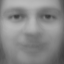

In [ ]:
pca = PCA(n_components=2)
pca_projected_train = pca.fit_transform(x_train.reshape(-1, img_height*img_width))
print(img_height*img_width)
print(x_train.shape)
print(pca_projected_train.shape)

print(pca.explained_variance_ratio_)

cv2_imshow(pca.mean_.reshape(img_height, img_width)*255)

<ipython-input-74-3069ae264de2>:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(pca_projected_train[:, 0], pca_projected_train[:, 1], c=y_train, edgecolor='none', alpha=0.8, cmap=plt.cm.get_cmap('Spectral', N_IDENTITIES))


[]

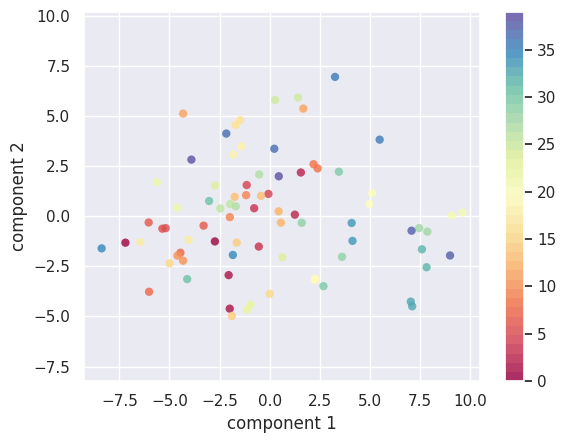

In [ ]:
# Dot diagram
plt.scatter(pca_projected_train[:, 0], pca_projected_train[:, 1], c=y_train, edgecolor='none', alpha=0.8, cmap=plt.cm.get_cmap('Spectral', N_IDENTITIES))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.axis('equal')
plt.colorbar()
plt.plot()

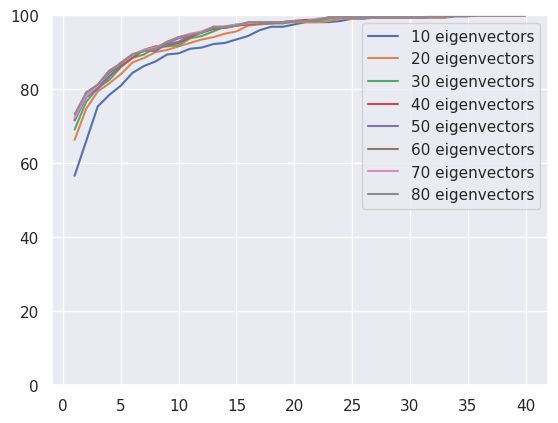

In [ ]:
# CMC plots for PCA
for i in range(10,81,10):
  # create PCA model with i eigenvectors
  pca = PCA(n_components=i)
  pca.fit(x_train.reshape(-1, img_height*img_width))

  # project gallery and probe
  gallery = pca.transform(x_train.reshape(-1, img_height*img_width))
  probe = pca.transform(x_test.reshape(-1, img_height*img_width))

  CMC = {}
  # For each test case
  for j in range(len(probe)):
    # Compute the distance to closest correct label.
    genuine_dist = np.inf
    for k in range(len(gallery)):
      if y_test[j] == y_train[k]:
        dist = np.sum((gallery[k]-probe[j])**2)
        if dist < genuine_dist:
          genuine_dist = dist
    # Compute number of incorrect labels closer than closest correct label.
    ids = set()
    for k in range(len(gallery)):
      if y_test[j] != y_train[k]:
        dist = np.sum((gallery[k]-probe[j])**2)
        if dist < genuine_dist:
          ids.add(y_train[k])
    # Record rank of closest correct label.
    rank=1+len(ids)
    if rank not in CMC:
      CMC[rank] = 1
    else:
      CMC[rank] += 1

  rank = []
  acc = []
  total = 0
  for j in range(1, N_IDENTITIES+1):
    if j in CMC:
      total += CMC[j]
    rank.append(j)
    acc.append(100.0*total/len(probe))

  plt.plot(rank, acc, label=str(i)+' eigenvectors')
  plt.legend()
  plt.ylim(0, 100)
  plt.plot()

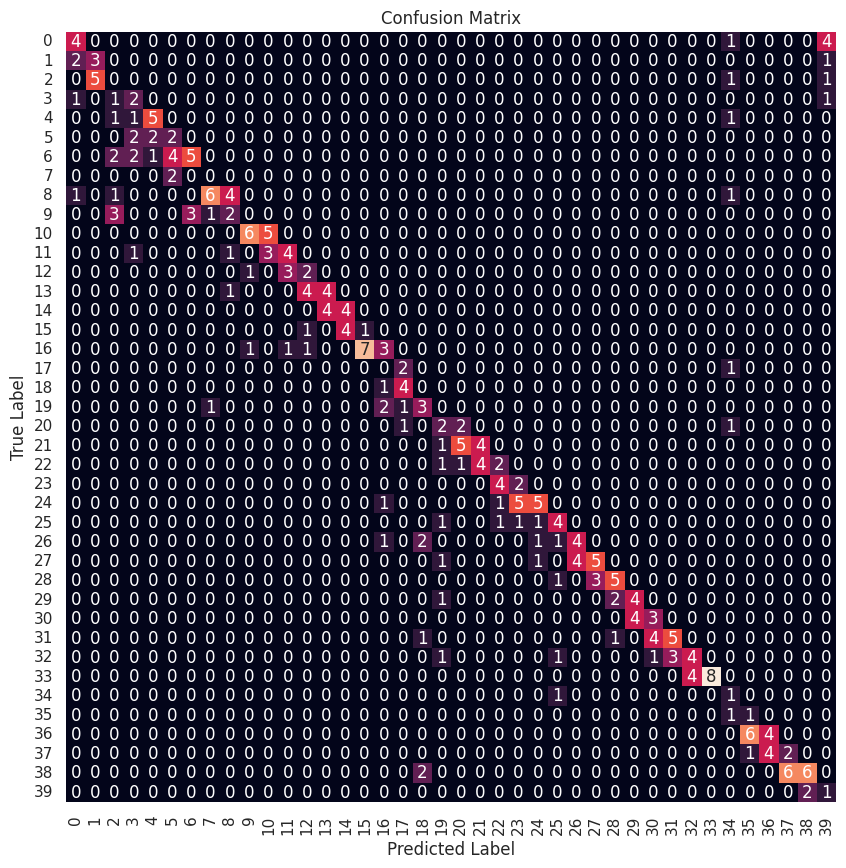

In [ ]:
'''
# Confusion Matrix
samples = (GALLERY_SIZE + 40)
pca = PCA(n_components = int(samples-1))
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

clf = SVC()
clf.fit(x_train_pca, y_train)
y_predicted = clf.predict(x_test_pca)

mat = confusion_matrix(y_test, y_predicted)
plt.figure(figsize = (10, 10))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,)
plt.xlabel('true label')
plt.ylabel('predicted label')
'''

# Generate confusion matrix
samples = (GALLERY_SIZE + 40)
pca = PCA(n_components = int(samples-1))
pca.fit(x_train)

y_pred = np.zeros(len(y_test)) # Initialize y_prediction

gallery = pca.transform(x_train)
probe = pca.transform(x_test)

CMC = {}
for j in range(len(probe)):
    genuine_dist = np.inf
    genuine_index = -1  # Index of the genuine match in the gallery

    for k in range(len(gallery)):
        if y_test[j] == y_train[k]:
            dist = np.sum((gallery[k] - probe[j]) ** 2)
            if dist < genuine_dist:
                genuine_dist = dist
                genuine_index = k

    # Set y_pred based on the rank
    rank = 1 + len([k for k in range(len(gallery)) if y_test[j] != y_train[k] and np.sum((gallery[k] - probe[j]) ** 2) < genuine_dist])
    rank = (rank + genuine_index) % len(gallery)
    y_pred[j] = y_train[rank]  # make "prediction"
cm = confusion_matrix(y_test, y_pred) # set cm based on "prediction"

# Plot the confusion matrix using seaborn
plt.figure(figsize = (10, 10))
sns.heatmap(cm.T, square=True, annot=True, fmt="d", cbar=False, xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

### **LDA**

(80, 4096)
(80, 2)


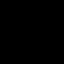

(40, 4096)


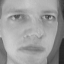

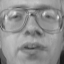

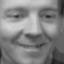

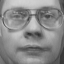

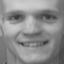

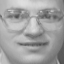

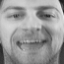

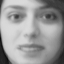

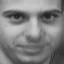

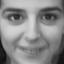

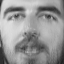

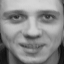

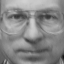

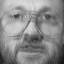

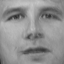

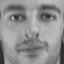

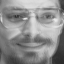

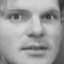

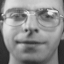

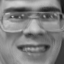

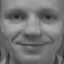

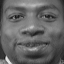

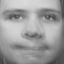

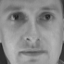

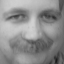

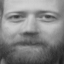

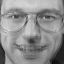

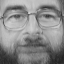

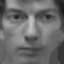

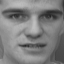

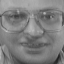

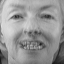

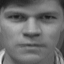

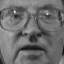

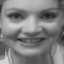

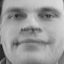

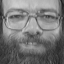

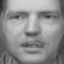

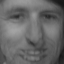

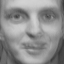

In [ ]:
lda = LDA(n_components=2)
projected = lda.fit_transform(x_train, y_train)
print(x_train.shape)
print(projected.shape)

cv2_imshow(lda.xbar_.reshape(img_height, img_width))

print(lda.means_.shape)
for i in range(N_IDENTITIES):
  cv2_imshow(lda.means_[i].reshape(img_height, img_width)*255)

<ipython-input-78-148295da15ca>:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(projected[:, 0], projected[:, 1], c=y_train, edgecolor='none', alpha=0.8, cmap=plt.cm.get_cmap('Spectral', N_IDENTITIES))


[]

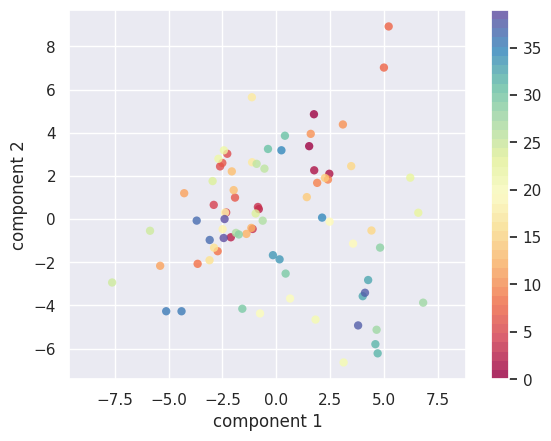

In [ ]:
# Dot diagram
plt.scatter(projected[:, 0], projected[:, 1], c=y_train, edgecolor='none', alpha=0.8, cmap=plt.cm.get_cmap('Spectral', N_IDENTITIES))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.axis('equal')
plt.colorbar()
plt.plot()

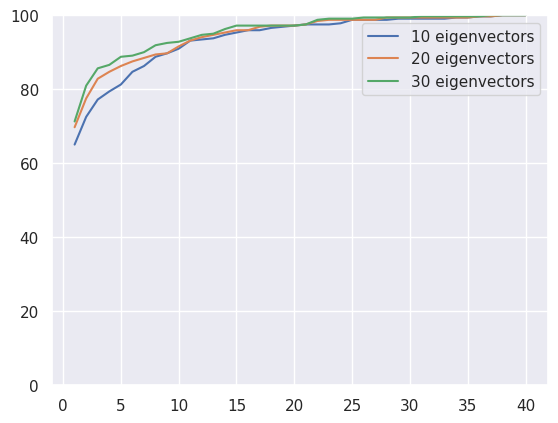

In [ ]:
# CMC plots for LDA
for i in range(10,40,10):
  lda = LDA(n_components=i)
  lda.fit(x_train.reshape(-1, img_height*img_width), y_train)

  gallery = lda.transform(x_train.reshape(-1, img_height*img_width))
  probe = lda.transform(x_test.reshape(-1, img_height*img_width))

  CMC = {}
  # For each test case
  for j in range(len(probe)):
    # Compute the distance to closest correct label.
    genuine_dist = np.inf
    for k in range(len(gallery)):
      if y_test[j] == y_train[k]:
        dist = np.sum((gallery[k]-probe[j])**2)
        if dist < genuine_dist:
          genuine_dist = dist
    # Compute number of incorrect labels closer than closest correct label.
    ids = set()
    for k in range(len(gallery)):
      if y_test[j] != y_train[k]:
        dist = np.sum((gallery[k]-probe[j])**2)
        if dist < genuine_dist:
          ids.add(y_train[k])
    # Record rank of closest correct label.
    rank=1+len(ids)
    if rank not in CMC:
      CMC[rank] = 1
    else:
      CMC[rank] += 1

  rank = []
  acc = []
  total = 0
  for j in range(1, N_IDENTITIES+1):
    if j in CMC:
      total += CMC[j]
    rank.append(j)
    acc.append(100.0*total/len(probe))

  plt.plot(rank, acc, label=str(i)+' eigenvectors')
  plt.legend()
  plt.ylim(0, 100)
  plt.plot()

Text(93.75, 0.5, 'predicted label')

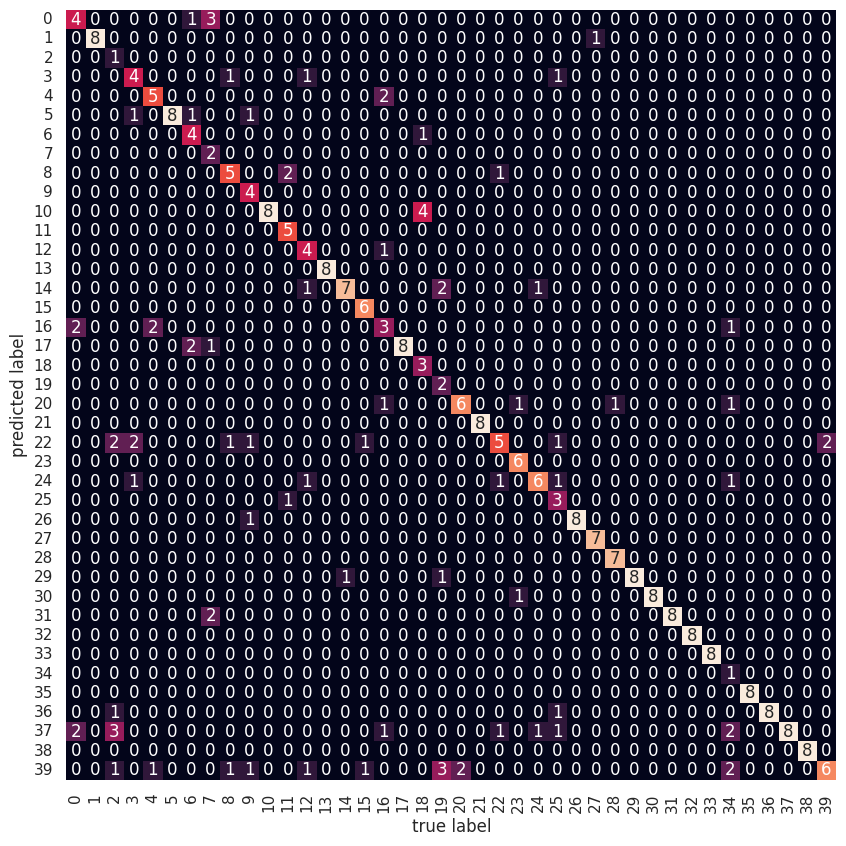

In [ ]:
# Confusion Matrix
y_predicted = lda.predict(x_test)

mat = confusion_matrix(y_test, y_predicted)
plt.figure(figsize = (10, 10))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,)
plt.xlabel('true label')
plt.ylabel('predicted label')

### **SVM**

In [ ]:
model = SVC(kernel='linear')
model.fit(x_train, y_train)

yfit = model.predict(x_test)

Text(93.75, 0.5, 'predicted label')

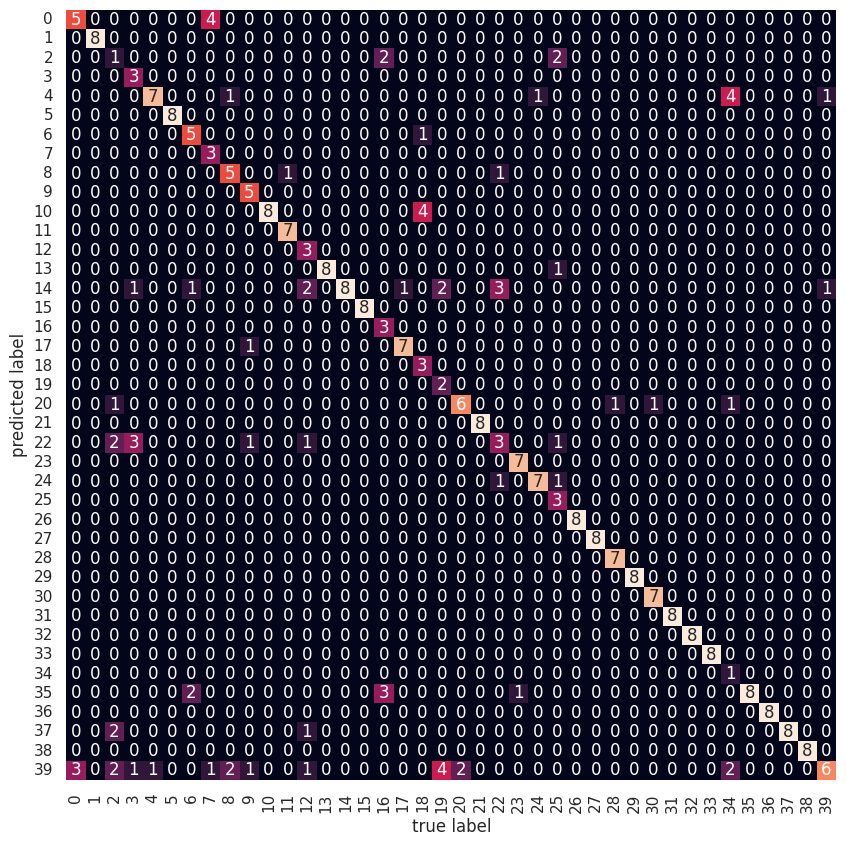

In [ ]:
# Confusion Matrix
mat = confusion_matrix(y_test, yfit)
plt.figure(figsize = (10,10))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,)
plt.xlabel('true label')
plt.ylabel('predicted label')

In [ ]:
model = SVC(kernel='linear', probability=True)
model.fit(x_train, y_train)

yfit = model.predict_proba(x_test)

print(yfit.shape)

(320, 40)


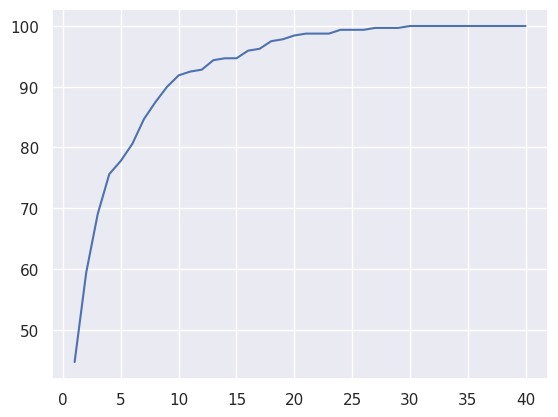

In [ ]:
# CMC plots for SVM
def plot_CMC(ysimilarity, ytarget):
  assert len(ysimilarity) == len(ytarget)
  CMC = {}
  for i in range(len(ysimilarity)):
    # get similarity for the correct class
    genuine_sim = ysimilarity[i][ytarget[i]]
    # count how many incorrect classes have higher similarity
    rank = 1
    for j, sim in enumerate(ysimilarity[i]):
      if j != ytarget[i]:
        if sim >= genuine_sim:
          rank += 1
    # save rank
    if rank not in CMC:
      CMC[rank] = 1
    else:
      CMC[rank] += 1

  # cumulative sum to create CMC
  N = []
  rankN = []
  total = 0
  for i in range(1,len(ysimilarity[0])+1):
    if i in CMC:
      total += CMC[i]
    N.append(i)
    rankN.append(100.0*total/len(ysimilarity))

  plt.plot(N, rankN)
  plt.plot()

plot_CMC(yfit, y_test)

### **CNN: LeNet-5**

In [ ]:
import tensorflow as tf

In [ ]:
# Split the dataset again to train a LeNet-5 model
N_IDENTITIES = len(np.unique(faces.target)) # how many different individuals are in the dataset
GALLERY_SIZE = 2                            # use the first GALLERY_SIZE images per individual for training, the rest for testing

gallery_indices = []
probe_indices = []
for i in range(N_IDENTITIES):
  indices = list(np.where(faces.target == i)[0])
  gallery_indices += indices[:GALLERY_SIZE]
  probe_indices += indices[GALLERY_SIZE:]

x_train = faces.images[gallery_indices].reshape(-1, img_height, img_width, 1)
y_train = faces.target[gallery_indices]
x_test = faces.images[probe_indices].reshape(-1, img_height, img_width, 1)
y_test = faces.target[probe_indices]

print(x_train.shape, x_test.shape, '\n')

print(x_train.shape, y_train.shape, x_train.dtype, y_train.dtype)
print(x_test.shape, y_test.shape, '\n')

(80, 64, 64, 1) (320, 64, 64, 1) 

(80, 64, 64, 1) (80,) float32 int64
(320, 64, 64, 1) (320,) 



In [ ]:
# Create model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(filters=6, kernel_size=(5, 5), activation='relu', input_shape=(64, 64, 1)))
model.add(tf.keras.layers.MaxPool2D())
model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=(5, 5), activation='relu'))
model.add(tf.keras.layers.MaxPool2D())
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=120, activation='relu'))
model.add(tf.keras.layers.Dense(units=84, activation='relu'))
model.add(tf.keras.layers.Dense(units=40, activation = 'softmax'))

print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 60, 60, 6)         156       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 30, 30, 6)         0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 26, 26, 16)        2416      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 13, 13, 16)        0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 2704)              0         
                                                                 
 dense_6 (Dense)             (None, 120)              

In [ ]:
# Training parameter
learning_rate = 0.001
loss_function = 'sparse_categorical_crossentropy'
batch_size = 10
num_epochs = 50

In [ ]:
# training configuration
optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss=loss_function, metrics=['accuracy'])


#train
history = model.fit(x=x_train,y=y_train, epochs=num_epochs, batch_size=batch_size)



scores = model.evaluate(x_train, y_train, verbose=0)
print('TRAINING SET\nLoss:', scores[0], '\nAccuracy:', scores[1])

scores = model.evaluate(x_test, y_test, verbose=0)
print('\nTEST SET\nLoss:', scores[0], '\nAccuracy:', scores[1])

Epoch 1/50
8/8 [==============================] - 1s 5ms/step - loss: 3.7085 - accuracy: 0.0250
Epoch 2/50
8/8 [==============================] - 0s 5ms/step - loss: 3.6773 - accuracy: 0.0250
Epoch 3/50
8/8 [==============================] - 0s 4ms/step - loss: 3.6541 - accuracy: 0.0250
Epoch 4/50
8/8 [==============================] - 0s 4ms/step - loss: 3.5982 - accuracy: 0.1375
Epoch 5/50
8/8 [==============================] - 0s 4ms/step - loss: 3.5244 - accuracy: 0.1000
Epoch 6/50
8/8 [==============================] - 0s 4ms/step - loss: 3.4130 - accuracy: 0.2375
Epoch 7/50
8/8 [==============================] - 0s 4ms/step - loss: 3.2739 - accuracy: 0.2750
Epoch 8/50
8/8 [==============================] - 0s 4ms/step - loss: 3.0167 - accuracy: 0.4250
Epoch 9/50
8/8 [==============================] - 0s 4ms/step - loss: 2.7028 - accuracy: 0.4625
Epoch 10/50
8/8 [==============================] - 0s 6ms/step - loss: 2.2509 - accuracy: 0.5750
Epoch 11/50
8/8 [======================

10/10 [==============================] - 0s 3ms/step


Text(0.5, 1.0, 'Confusion Matrix')

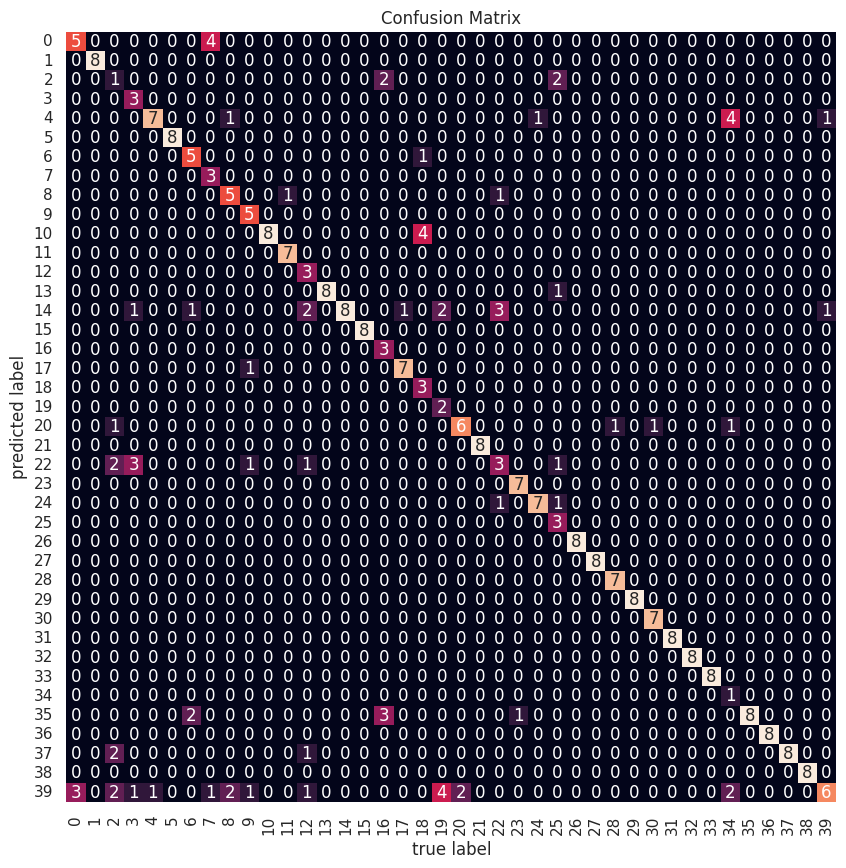

In [ ]:
# Confusion Matrix
prediction = model.predict(x_test)
pred = np.argmax(prediction, axis = 1)
mat_1 = confusion_matrix(y_test, pred)
plt.figure(figsize = (10, 10))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,)
plt.xlabel("true label")
plt.ylabel("predicted label")
plt.title('Confusion Matrix')

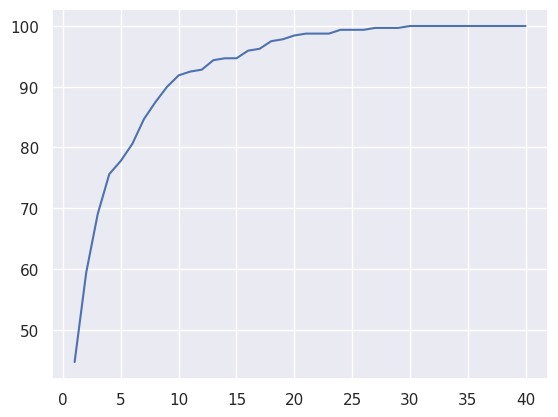

In [ ]:
# CMC plots for LeNet-5
def plot_CMC(ysimilarity, ytarget):
  assert len(ysimilarity) == len(ytarget)
  CMC = {}
  for i in range(len(ysimilarity)):
    # get similarity for the correct class
    genuine_sim = ysimilarity[i][ytarget[i]]
    # count how many incorrect classes have higher similarity
    rank = 1
    for j, sim in enumerate(ysimilarity[i]):
      if j != ytarget[i]:
        if sim >= genuine_sim:
          rank += 1
    # save rank
    if rank not in CMC:
      CMC[rank] = 1
    else:
      CMC[rank] += 1

  # cumulative sum to create CMC
  N = []
  rankN = []
  total = 0
  for i in range(1,len(ysimilarity[0])+1):
    if i in CMC:
      total += CMC[i]
    N.append(i)
    rankN.append(100.0*total/len(ysimilarity))

  plt.plot(N, rankN)
  plt.plot()

plot_CMC(yfit, y_test)

Augmentation

---


I devised two distinct image augmentation techniques—one for vertically flipping the image and another for horizontally flipping it. I believe these image augmentation methods are valuable as they provide LeNet-5 with a more diverse dataset, lessening the risk of overfitting. Moreover, horizontally flipped images might enhance the program's ability to recognize faces captured under varying conditions, such as different camera distances or instances where the images are flipped compared to the training data.

In [ ]:
# Install these for the following library
!pip install imgaug
!pip install ipyplot
import imageio
import imgaug as ia
import imgaug.augmenters as iaa

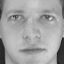

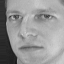

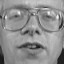

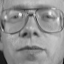

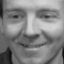

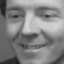

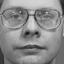

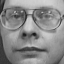

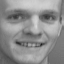

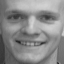

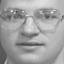

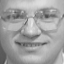

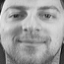

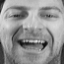

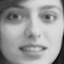

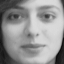

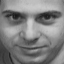

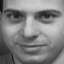

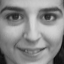

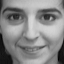

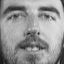

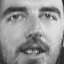

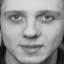

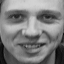

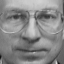

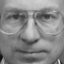

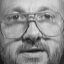

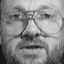

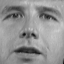

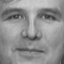

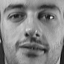

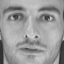

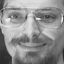

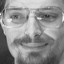

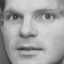

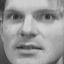

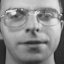

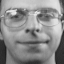

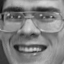

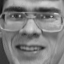

In [ ]:
# Horizontal Flip
for i in range (N_IDENTITIES):
  hflip= iaa.Fliplr(p=1.0)
  input_hf= hflip.augment_image(x_train[i].reshape(img_height, img_width)*255.0)
  cv2_imshow(input_hf)

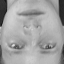

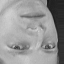

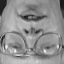

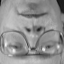

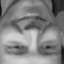

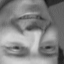

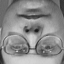

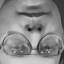

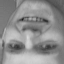

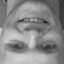

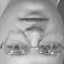

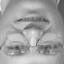

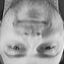

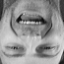

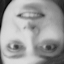

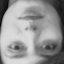

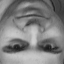

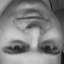

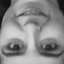

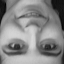

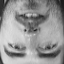

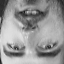

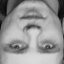

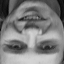

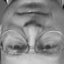

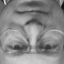

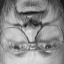

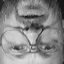

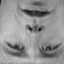

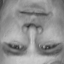

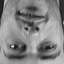

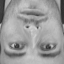

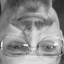

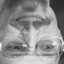

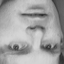

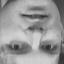

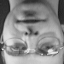

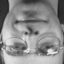

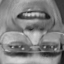

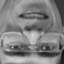

In [ ]:
# Vertical Flip
for i in range (N_IDENTITIES):
  vflip= iaa.Flipud(p=1.0)
  input_vf= vflip.augment_image(x_train[i].reshape(img_height, img_width)*255.0)
  cv2_imshow(input_vf)

# **50% training, 50% testing**

In [ ]:
N_IDENTITIES = len(np.unique(faces.target)) # how many different individuals are in the dataset
GALLERY_SIZE = 5                            # use the first GALLERY_SIZE images per individual for training, the rest for testing

gallery_indices = []
probe_indices = []
for i in range(N_IDENTITIES):
  indices = list(np.where(faces.target == i)[0])
  gallery_indices += indices[:GALLERY_SIZE]
  probe_indices += indices[GALLERY_SIZE:]

x_train = faces.images[gallery_indices].reshape(-1, img_height*img_width) # vectorize train images
y_train = faces.target[gallery_indices]
x_test = faces.images[probe_indices].reshape(-1, img_height*img_width)    # vectorize test images
y_test = faces.target[probe_indices]

print(x_train.shape, x_test.shape)

(200, 4096) (200, 4096)


In [ ]:
print(np.unique(y_train, return_counts=True))

print(np.unique(y_test, return_counts=True))

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39]), array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]))
(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39]), array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]))


## **Baseline Implementation**

This is a repeated baseline to show differences between each scenario.

In [ ]:
# Baseline: Gaussian Naive Bayes
nb_model = GaussianNB()
nb_model.fit(x_train, y_train)
y_predicted = nb_model.predict(x_test)

tests = x_test.shape[0]
print("Naive Bayes Total Tests: ", tests)

failed = (y_test != y_predicted).sum()
print("Naive Bayes Failed Predictions: ", failed)

print("Naive Bayes Error Percentage: ", (failed/tests)*100)

accuracy = accuracy_score(y_test, y_predicted)
print(f"Naive Bayes Accuracy Score: {accuracy*100:.2f}")

Naive Bayes Total Tests:  200
Naive Bayes Failed Predictions:  55
Naive Bayes Error Percentage:  27.500000000000004
Naive Bayes Accuracy Score: 72.50


## **Run the experiments**
Here is the code I used to get the results below!

### **PCA**

4096
(200, 4096)
(200, 2)
[0.23886341 0.11682407]


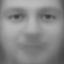

In [ ]:
pca = PCA(n_components=2)
pca_projected_train = pca.fit_transform(x_train.reshape(-1, img_height*img_width))
print(img_height*img_width)
print(x_train.shape)
print(pca_projected_train.shape)

print(pca.explained_variance_ratio_)

cv2_imshow(pca.mean_.reshape(img_height, img_width)*255)

<ipython-input-99-3069ae264de2>:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(pca_projected_train[:, 0], pca_projected_train[:, 1], c=y_train, edgecolor='none', alpha=0.8, cmap=plt.cm.get_cmap('Spectral', N_IDENTITIES))


[]

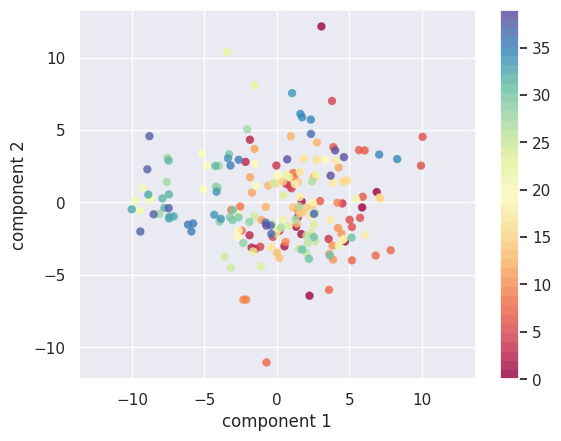

In [ ]:
# Dot diagram
plt.scatter(pca_projected_train[:, 0], pca_projected_train[:, 1], c=y_train, edgecolor='none', alpha=0.8, cmap=plt.cm.get_cmap('Spectral', N_IDENTITIES))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.axis('equal')
plt.colorbar()
plt.plot()

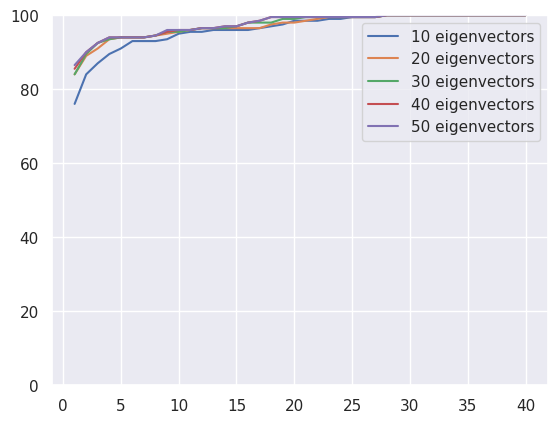

In [ ]:
# CMC plots for PCA
for i in range(10,51,10):
  # create PCA model with i eigenvectors
  pca = PCA(n_components=i)
  pca.fit(x_train.reshape(-1, img_height*img_width))

  # project gallery and probe
  gallery = pca.transform(x_train.reshape(-1, img_height*img_width))
  probe = pca.transform(x_test.reshape(-1, img_height*img_width))

  CMC = {}
  # For each test case
  for j in range(len(probe)):
    # Compute the distance to closest correct label.
    genuine_dist = np.inf
    for k in range(len(gallery)):
      if y_test[j] == y_train[k]:
        dist = np.sum((gallery[k]-probe[j])**2)
        if dist < genuine_dist:
          genuine_dist = dist
    # Compute number of incorrect labels closer than closest correct label.
    ids = set()
    for k in range(len(gallery)):
      if y_test[j] != y_train[k]:
        dist = np.sum((gallery[k]-probe[j])**2)
        if dist < genuine_dist:
          ids.add(y_train[k])
    # Record rank of closest correct label.
    rank=1+len(ids)
    if rank not in CMC:
      CMC[rank] = 1
    else:
      CMC[rank] += 1

  rank = []
  acc = []
  total = 0
  for j in range(1, N_IDENTITIES+1):
    if j in CMC:
      total += CMC[j]
    rank.append(j)
    acc.append(100.0*total/len(probe))

  plt.plot(rank, acc, label=str(i)+' eigenvectors')
  plt.legend()
  plt.ylim(0, 100)
  plt.plot()

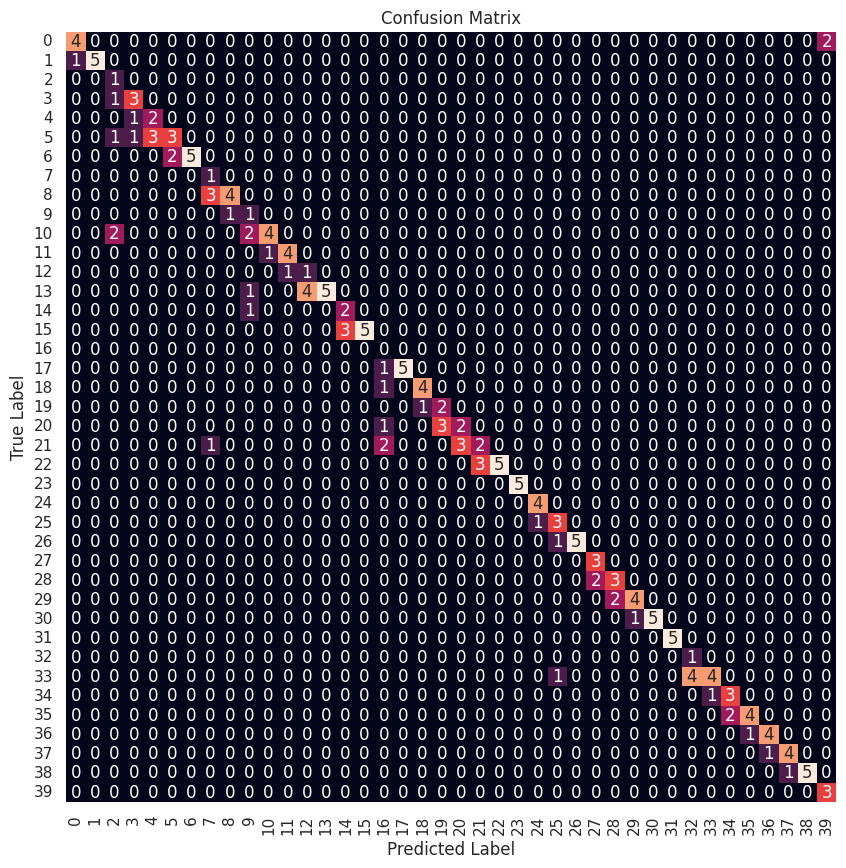

In [ ]:
'''
# Confusion Matrix
samples = (GALLERY_SIZE + 40)
pca = PCA(n_components = int(samples-1))
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

clf = SVC()
clf.fit(x_train_pca, y_train)
y_predicted = clf.predict(x_test_pca)

mat = confusion_matrix(y_test, y_predicted)
plt.figure(figsize = (10, 10))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,)
plt.xlabel('true label')
plt.ylabel('predicted label')
'''

# Generate confusion matrix
samples = (GALLERY_SIZE + 40)
pca = PCA(n_components = int(samples-1))
pca.fit(x_train)

y_pred = np.zeros(len(y_test)) # Initialize y_prediction

gallery = pca.transform(x_train)
probe = pca.transform(x_test)

CMC = {}
for j in range(len(probe)):
    genuine_dist = np.inf
    genuine_index = -1  # Index of the genuine match in the gallery

    for k in range(len(gallery)):
        if y_test[j] == y_train[k]:
            dist = np.sum((gallery[k] - probe[j]) ** 2)
            if dist < genuine_dist:
                genuine_dist = dist
                genuine_index = k

    # Set y_pred based on the rank
    rank = 1 + len([k for k in range(len(gallery)) if y_test[j] != y_train[k] and np.sum((gallery[k] - probe[j]) ** 2) < genuine_dist])
    rank = (rank + genuine_index) % len(gallery)
    y_pred[j] = y_train[rank]  # make "prediction"
cm = confusion_matrix(y_test, y_pred) # set cm based on "prediction"

# Plot the confusion matrix using seaborn
plt.figure(figsize = (10, 10))
sns.heatmap(cm.T, square=True, annot=True, fmt="d", cbar=False, xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

### **LDA**

(200, 4096)
(200, 2)


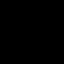

(40, 4096)


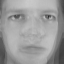

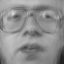

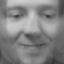

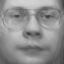

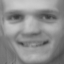

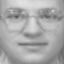

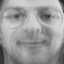

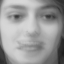

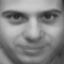

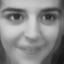

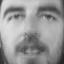

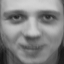

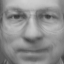

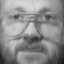

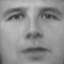

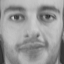

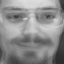

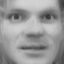

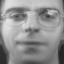

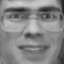

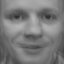

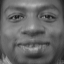

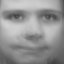

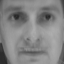

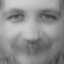

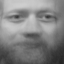

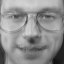

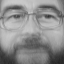

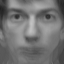

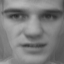

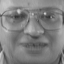

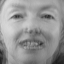

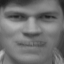

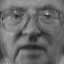

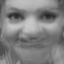

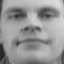

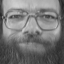

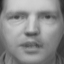

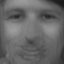

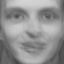

In [ ]:
lda = LDA(n_components=2)
projected = lda.fit_transform(x_train, y_train)
print(x_train.shape)
print(projected.shape)

cv2_imshow(lda.xbar_.reshape(img_height, img_width))

print(lda.means_.shape)
for i in range(N_IDENTITIES):
  cv2_imshow(lda.means_[i].reshape(img_height, img_width)*255)

<ipython-input-103-148295da15ca>:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(projected[:, 0], projected[:, 1], c=y_train, edgecolor='none', alpha=0.8, cmap=plt.cm.get_cmap('Spectral', N_IDENTITIES))


[]

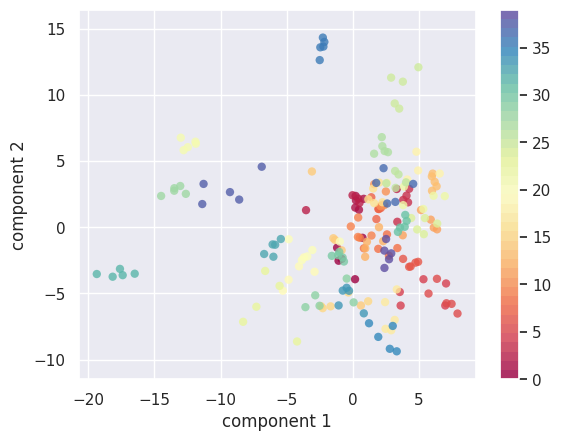

In [ ]:
# Dot diagram
plt.scatter(projected[:, 0], projected[:, 1], c=y_train, edgecolor='none', alpha=0.8, cmap=plt.cm.get_cmap('Spectral', N_IDENTITIES))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.axis('equal')
plt.colorbar()
plt.plot()

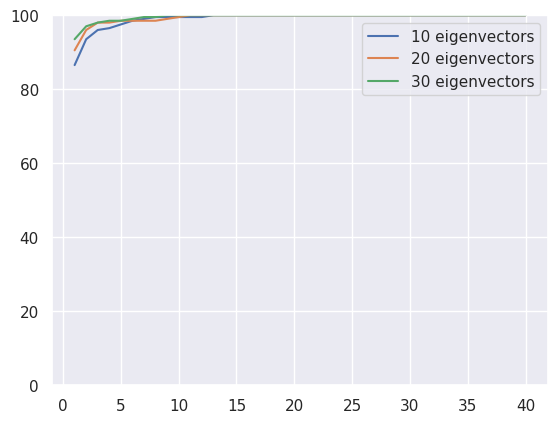

In [ ]:
# CMC plots for LDA
for i in range(10,40,10):
  lda = LDA(n_components=i)
  lda.fit(x_train.reshape(-1, img_height*img_width), y_train)

  gallery = lda.transform(x_train.reshape(-1, img_height*img_width))
  probe = lda.transform(x_test.reshape(-1, img_height*img_width))

  CMC = {}
  # For each test case
  for j in range(len(probe)):
    # Compute the distance to closest correct label.
    genuine_dist = np.inf
    for k in range(len(gallery)):
      if y_test[j] == y_train[k]:
        dist = np.sum((gallery[k]-probe[j])**2)
        if dist < genuine_dist:
          genuine_dist = dist
    # Compute number of incorrect labels closer than closest correct label.
    ids = set()
    for k in range(len(gallery)):
      if y_test[j] != y_train[k]:
        dist = np.sum((gallery[k]-probe[j])**2)
        if dist < genuine_dist:
          ids.add(y_train[k])
    # Record rank of closest correct label.
    rank=1+len(ids)
    if rank not in CMC:
      CMC[rank] = 1
    else:
      CMC[rank] += 1

  rank = []
  acc = []
  total = 0
  for j in range(1, N_IDENTITIES+1):
    if j in CMC:
      total += CMC[j]
    rank.append(j)
    acc.append(100.0*total/len(probe))

  plt.plot(rank, acc, label=str(i)+' eigenvectors')
  plt.legend()
  plt.ylim(0, 100)
  plt.plot()

Text(93.75, 0.5, 'predicted label')

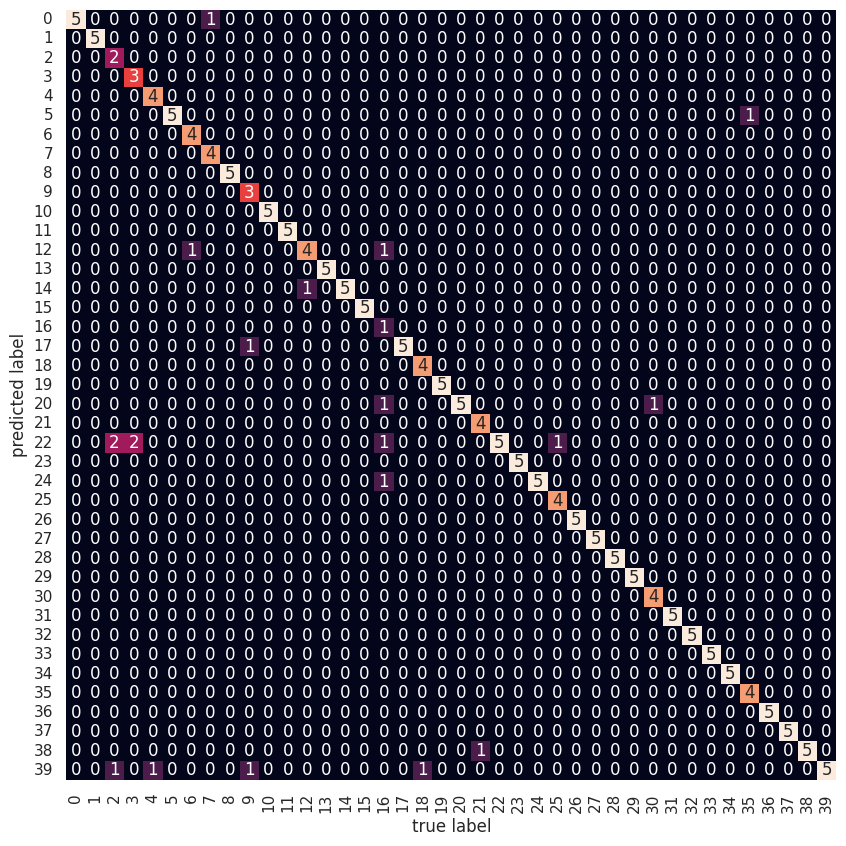

In [ ]:
# Confusion Matrix
y_predicted = lda.predict(x_test)

mat = confusion_matrix(y_test, y_predicted)
plt.figure(figsize = (10, 10))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,)
plt.xlabel('true label')
plt.ylabel('predicted label')

### **SVM**

In [ ]:
model = SVC(kernel='linear')
model.fit(x_train, y_train)

yfit = model.predict(x_test)

Text(93.75, 0.5, 'predicted label')

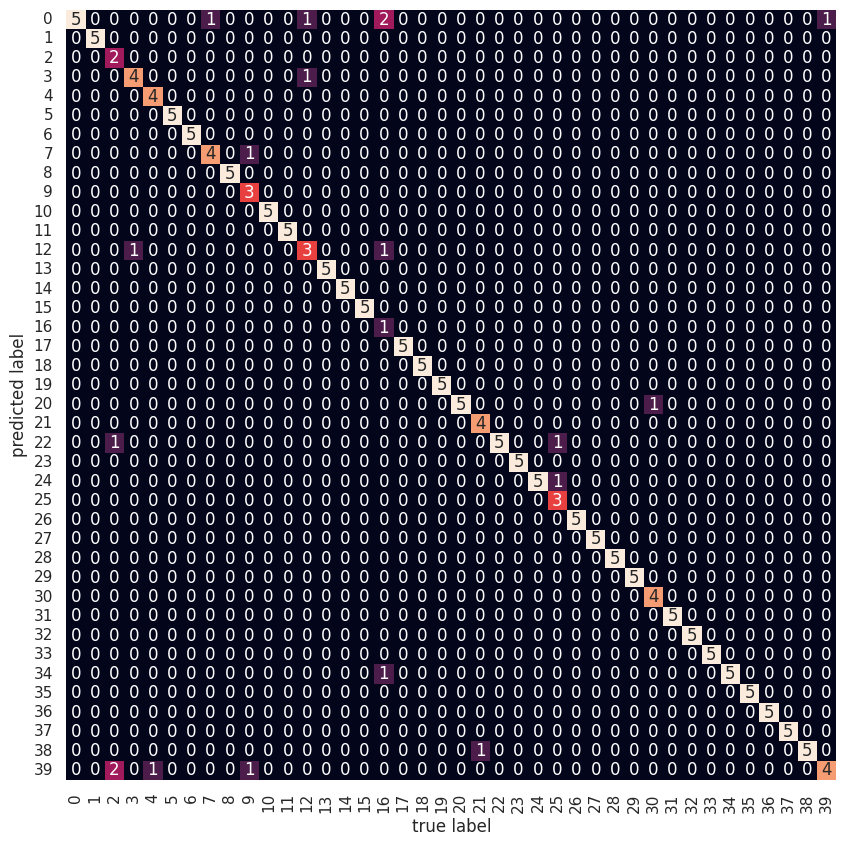

In [ ]:
# Confusion Matrix
mat = confusion_matrix(y_test, yfit)
plt.figure(figsize = (10,10))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,)
plt.xlabel('true label')
plt.ylabel('predicted label')

In [ ]:
model = SVC(kernel='linear', probability=True)
model.fit(x_train, y_train)

yfit = model.predict_proba(x_test)

print(yfit.shape)

(200, 40)


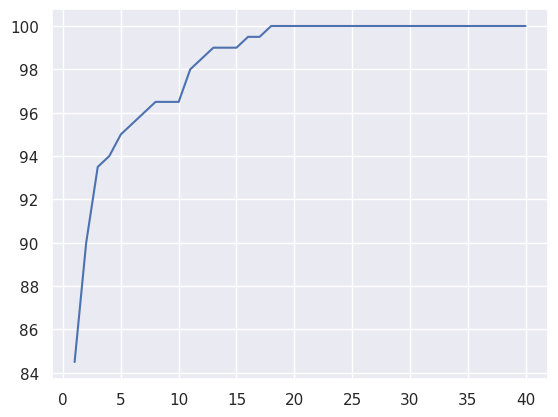

In [ ]:
# CMC plots for SVM
def plot_CMC(ysimilarity, ytarget):
  assert len(ysimilarity) == len(ytarget)
  CMC = {}
  for i in range(len(ysimilarity)):
    # get similarity for the correct class
    genuine_sim = ysimilarity[i][ytarget[i]]
    # count how many incorrect classes have higher similarity
    rank = 1
    for j, sim in enumerate(ysimilarity[i]):
      if j != ytarget[i]:
        if sim >= genuine_sim:
          rank += 1
    # save rank
    if rank not in CMC:
      CMC[rank] = 1
    else:
      CMC[rank] += 1

  # cumulative sum to create CMC
  N = []
  rankN = []
  total = 0
  for i in range(1,len(ysimilarity[0])+1):
    if i in CMC:
      total += CMC[i]
    N.append(i)
    rankN.append(100.0*total/len(ysimilarity))

  plt.plot(N, rankN)
  plt.plot()

plot_CMC(yfit, y_test)

### **CNN: LeNet-5**

In [ ]:
# Split the dataset again to train a LeNet-5 model
N_IDENTITIES = len(np.unique(faces.target)) # how many different individuals are in the dataset
GALLERY_SIZE = 5                            # use the first GALLERY_SIZE images per individual for training, the rest for testing

gallery_indices = []
probe_indices = []
for i in range(N_IDENTITIES):
  indices = list(np.where(faces.target == i)[0])
  gallery_indices += indices[:GALLERY_SIZE]
  probe_indices += indices[GALLERY_SIZE:]

x_train = faces.images[gallery_indices].reshape(-1, img_height, img_width, 1)
y_train = faces.target[gallery_indices]
x_test = faces.images[probe_indices].reshape(-1, img_height, img_width, 1)
y_test = faces.target[probe_indices]

print(x_train.shape, x_test.shape, '\n')

print(x_train.shape, y_train.shape, x_train.dtype, y_train.dtype)
print(x_test.shape, y_test.shape, '\n')

(200, 64, 64, 1) (200, 64, 64, 1) 

(200, 64, 64, 1) (200,) float32 int64
(200, 64, 64, 1) (200,) 



In [ ]:
# Create model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(filters=6, kernel_size=(5, 5), activation='relu', input_shape=(64, 64, 1)))
model.add(tf.keras.layers.MaxPool2D())
model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=(5, 5), activation='relu'))
model.add(tf.keras.layers.MaxPool2D())
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=120, activation='relu'))
model.add(tf.keras.layers.Dense(units=84, activation='relu'))
model.add(tf.keras.layers.Dense(units=40, activation = 'softmax'))

print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 60, 60, 6)         156       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 30, 30, 6)         0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 26, 26, 16)        2416      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 13, 13, 16)        0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 2704)              0         
                                                                 
 dense_9 (Dense)             (None, 120)              

In [ ]:
# Training parameter
learning_rate = 0.001
loss_function = 'sparse_categorical_crossentropy'
batch_size = 10
num_epochs = 50

In [ ]:
# training configuration
optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss=loss_function, metrics=['accuracy'])


#train
history = model.fit(x=x_train,y=y_train, epochs=num_epochs, batch_size=batch_size)



scores = model.evaluate(x_train, y_train, verbose=0)
print('TRAINING SET\nLoss:', scores[0], '\nAccuracy:', scores[1])

scores = model.evaluate(x_test, y_test, verbose=0)
print('\nTEST SET\nLoss:', scores[0], '\nAccuracy:', scores[1])

Epoch 1/50
20/20 [==============================] - 1s 4ms/step - loss: 3.7359 - accuracy: 0.0250
Epoch 2/50
20/20 [==============================] - 0s 4ms/step - loss: 3.6898 - accuracy: 0.0400
Epoch 3/50
20/20 [==============================] - 0s 4ms/step - loss: 3.6776 - accuracy: 0.0600
Epoch 4/50
20/20 [==============================] - 0s 4ms/step - loss: 3.6357 - accuracy: 0.0600
Epoch 5/50
20/20 [==============================] - 0s 4ms/step - loss: 3.4286 - accuracy: 0.1100
Epoch 6/50
20/20 [==============================] - 0s 4ms/step - loss: 2.9150 - accuracy: 0.2700
Epoch 7/50
20/20 [==============================] - 0s 4ms/step - loss: 2.0305 - accuracy: 0.4550
Epoch 8/50
20/20 [==============================] - 0s 4ms/step - loss: 1.4484 - accuracy: 0.6550
Epoch 9/50
20/20 [==============================] - 0s 4ms/step - loss: 0.9192 - accuracy: 0.7700
Epoch 10/50
20/20 [==============================] - 0s 4ms/step - loss: 0.5409 - accuracy: 0.8700
Epoch 11/50
20/20 [

7/7 [==============================] - 0s 5ms/step


Text(0.5, 1.0, 'Confusion Matrix')

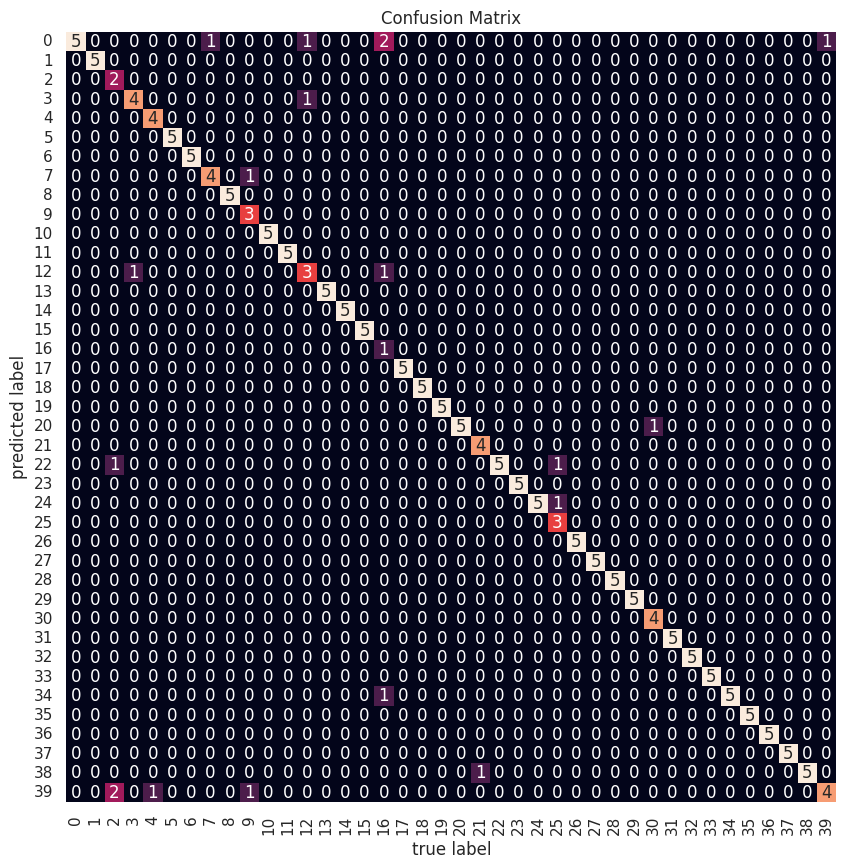

In [ ]:
# Confusion Matrix
prediction = model.predict(x_test)
pred = np.argmax(prediction, axis = 1)
mat_1 = confusion_matrix(y_test, pred)
plt.figure(figsize = (10, 10))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,)
plt.xlabel("true label")
plt.ylabel("predicted label")
plt.title('Confusion Matrix')

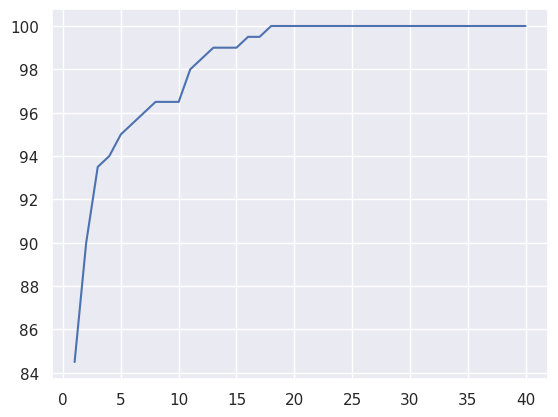

In [ ]:
# CMC plots for LeNet-5
def plot_CMC(ysimilarity, ytarget):
  assert len(ysimilarity) == len(ytarget)
  CMC = {}
  for i in range(len(ysimilarity)):
    # get similarity for the correct class
    genuine_sim = ysimilarity[i][ytarget[i]]
    # count how many incorrect classes have higher similarity
    rank = 1
    for j, sim in enumerate(ysimilarity[i]):
      if j != ytarget[i]:
        if sim >= genuine_sim:
          rank += 1
    # save rank
    if rank not in CMC:
      CMC[rank] = 1
    else:
      CMC[rank] += 1

  # cumulative sum to create CMC
  N = []
  rankN = []
  total = 0
  for i in range(1,len(ysimilarity[0])+1):
    if i in CMC:
      total += CMC[i]
    N.append(i)
    rankN.append(100.0*total/len(ysimilarity))

  plt.plot(N, rankN)
  plt.plot()

plot_CMC(yfit, y_test)

**Augmentation**

---
This is a repeated augmentation to show differences between each scenario.


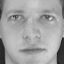

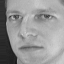

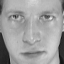

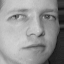

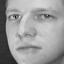

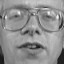

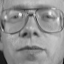

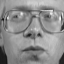

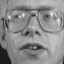

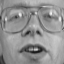

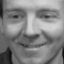

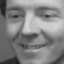

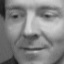

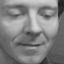

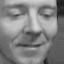

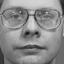

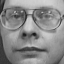

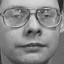

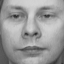

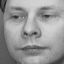

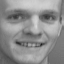

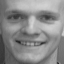

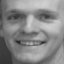

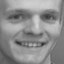

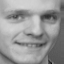

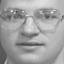

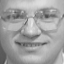

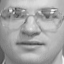

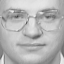

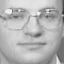

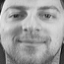

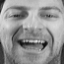

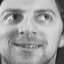

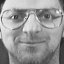

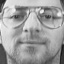

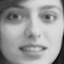

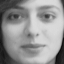

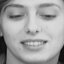

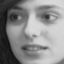

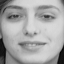

In [ ]:
# Horizontal Flip
for i in range (N_IDENTITIES):
  hflip= iaa.Fliplr(p=1.0)
  input_hf= hflip.augment_image(x_train[i].reshape(img_height, img_width)*255.0)
  cv2_imshow(input_hf)

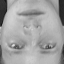

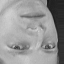

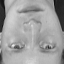

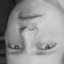

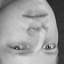

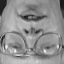

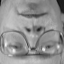

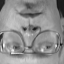

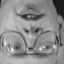

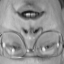

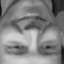

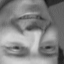

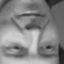

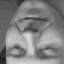

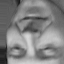

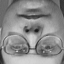

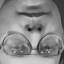

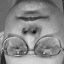

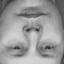

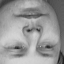

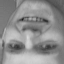

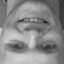

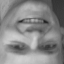

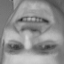

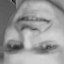

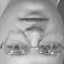

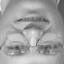

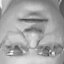

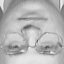

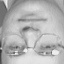

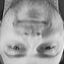

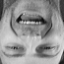

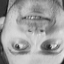

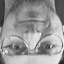

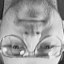

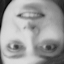

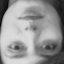

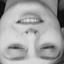

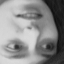

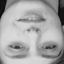

In [ ]:
#Vertical Flip
for i in range (N_IDENTITIES):
  vflip= iaa.Flipud(p=1.0)
  input_vf= vflip.augment_image(x_train[i].reshape(img_height, img_width)*255.0)
  cv2_imshow(input_vf)

# **80% training, 20% testing**

In [ ]:
N_IDENTITIES = len(np.unique(faces.target)) # how many different individuals are in the dataset
GALLERY_SIZE = 8                            # use the first GALLERY_SIZE images per individual for training, the rest for testing

gallery_indices = []
probe_indices = []
for i in range(N_IDENTITIES):
  indices = list(np.where(faces.target == i)[0])
  gallery_indices += indices[:GALLERY_SIZE]
  probe_indices += indices[GALLERY_SIZE:]

x_train = faces.images[gallery_indices].reshape(-1, img_height*img_width) # vectorize train images
y_train = faces.target[gallery_indices]
x_test = faces.images[probe_indices].reshape(-1, img_height*img_width)    # vectorize test images
y_test = faces.target[probe_indices]

print(x_train.shape, x_test.shape)

(320, 4096) (80, 4096)


In [ ]:
print(np.unique(y_train, return_counts=True))

print(np.unique(y_test, return_counts=True))

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39]), array([8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8]))
(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39]), array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]))


## **Baseline Implementation**

This is a repeated baseline to show differences between each scenario.

In [ ]:
# Baseline: Gaussian Naive Bayes
nb_model = GaussianNB()
nb_model.fit(x_train, y_train)
y_predicted = nb_model.predict(x_test)

tests = x_test.shape[0]
print("Naive Bayes Total Tests: ", tests)

failed = (y_test != y_predicted).sum()
print("Naive Bayes Failed Predictions: ", failed)

print("Naive Bayes Error Percentage: ", (failed/tests)*100)

accuracy = accuracy_score(y_test, y_predicted)
print(f"Naive Bayes Accuracy Score: {accuracy*100:.2f}")

Naive Bayes Total Tests:  80
Naive Bayes Failed Predictions:  12
Naive Bayes Error Percentage:  15.0
Naive Bayes Accuracy Score: 85.00


## **Run the experiments**
Here is the code I used to get the results below!

### **PCA**

4096
(320, 4096)
(320, 2)
[0.2365368  0.12971406]


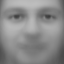

In [ ]:
pca = PCA(n_components=2)
pca_projected_train = pca.fit_transform(x_train.reshape(-1, img_height*img_width))
print(img_height*img_width)
print(x_train.shape)
print(pca_projected_train.shape)

print(pca.explained_variance_ratio_)

cv2_imshow(pca.mean_.reshape(img_height, img_width)*255)

<ipython-input-124-3069ae264de2>:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(pca_projected_train[:, 0], pca_projected_train[:, 1], c=y_train, edgecolor='none', alpha=0.8, cmap=plt.cm.get_cmap('Spectral', N_IDENTITIES))


[]

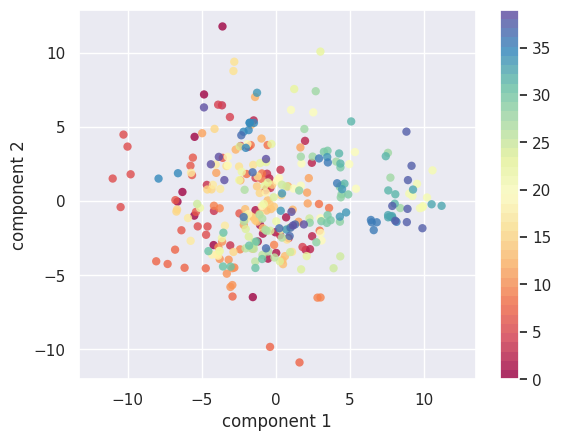

In [ ]:
# Dot diagram
plt.scatter(pca_projected_train[:, 0], pca_projected_train[:, 1], c=y_train, edgecolor='none', alpha=0.8, cmap=plt.cm.get_cmap('Spectral', N_IDENTITIES))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.axis('equal')
plt.colorbar()
plt.plot()

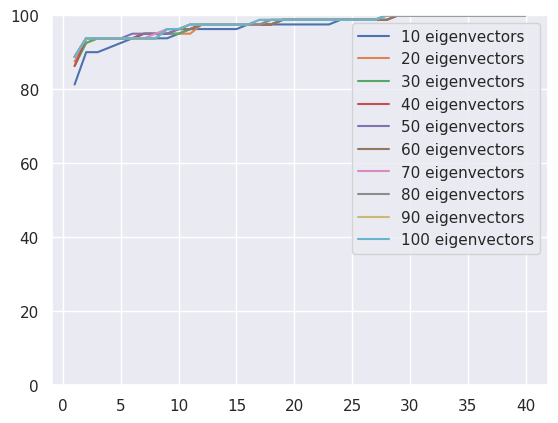

In [ ]:
# CMC plots for PCA
for i in range(10,101,10):
  # create PCA model with i eigenvectors
  pca = PCA(n_components=i)
  pca.fit(x_train.reshape(-1, img_height*img_width))

  # project gallery and probe
  gallery = pca.transform(x_train.reshape(-1, img_height*img_width))
  probe = pca.transform(x_test.reshape(-1, img_height*img_width))

  CMC = {}
  # For each test case
  for j in range(len(probe)):
    # Compute the distance to closest correct label.
    genuine_dist = np.inf
    for k in range(len(gallery)):
      if y_test[j] == y_train[k]:
        dist = np.sum((gallery[k]-probe[j])**2)
        if dist < genuine_dist:
          genuine_dist = dist
    # Compute number of incorrect labels closer than closest correct label.
    ids = set()
    for k in range(len(gallery)):
      if y_test[j] != y_train[k]:
        dist = np.sum((gallery[k]-probe[j])**2)
        if dist < genuine_dist:
          ids.add(y_train[k])
    # Record rank of closest correct label.
    rank=1+len(ids)
    if rank not in CMC:
      CMC[rank] = 1
    else:
      CMC[rank] += 1

  rank = []
  acc = []
  total = 0
  for j in range(1, N_IDENTITIES+1):
    if j in CMC:
      total += CMC[j]
    rank.append(j)
    acc.append(100.0*total/len(probe))

  plt.plot(rank, acc, label=str(i)+' eigenvectors')
  plt.legend()
  plt.ylim(0, 100)
  plt.plot()

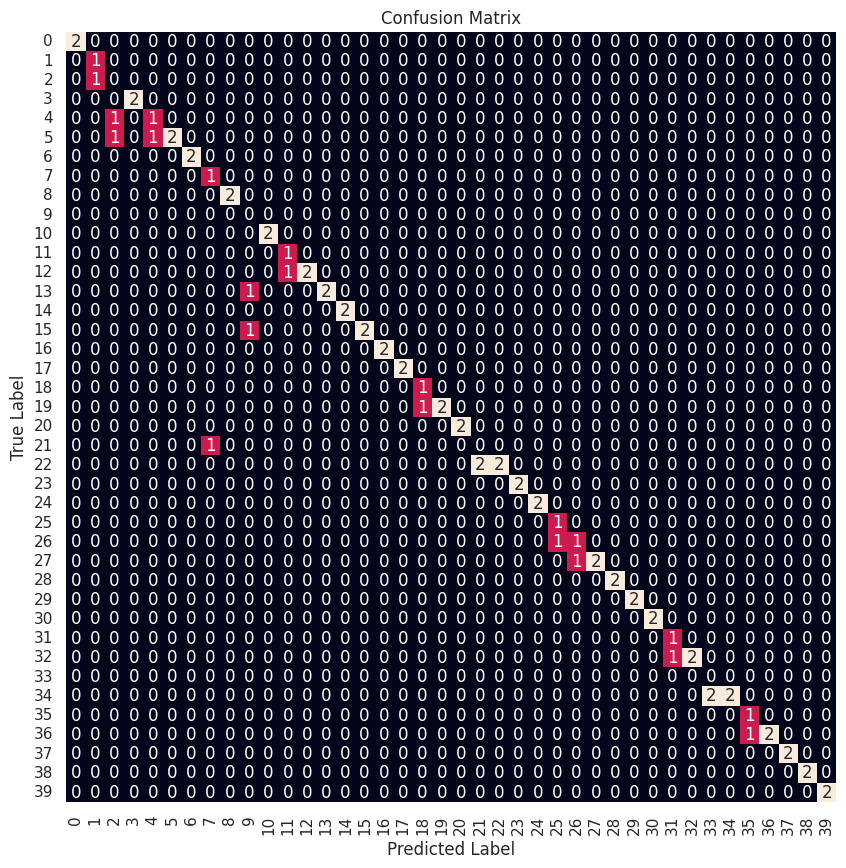

In [ ]:
# Confusion Matrix
'''
samples = (GALLERY_SIZE + 40)
pca = PCA(n_components = int(samples-1))
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

clf = SVC()
clf.fit(x_train_pca, y_train)
y_predicted = clf.predict(x_test_pca)

mat = confusion_matrix(y_test, y_predicted)
plt.figure(figsize = (10, 10))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,)
plt.xlabel('true label')
plt.ylabel('predicted label')
'''

# Generate confusion matrix
samples = (GALLERY_SIZE + 40)
pca = PCA(n_components = int(samples-1))
pca.fit(x_train)

y_pred = np.zeros(len(y_test)) # Initialize y_prediction

gallery = pca.transform(x_train)
probe = pca.transform(x_test)

CMC = {}
for j in range(len(probe)):
    genuine_dist = np.inf
    genuine_index = -1  # Index of the genuine match in the gallery

    for k in range(len(gallery)):
        if y_test[j] == y_train[k]:
            dist = np.sum((gallery[k] - probe[j]) ** 2)
            if dist < genuine_dist:
                genuine_dist = dist
                genuine_index = k

    # Set y_pred based on the rank
    rank = 1 + len([k for k in range(len(gallery)) if y_test[j] != y_train[k] and np.sum((gallery[k] - probe[j]) ** 2) < genuine_dist])
    rank = (rank + genuine_index) % len(gallery)
    y_pred[j] = y_train[rank]  # make "prediction"
cm = confusion_matrix(y_test, y_pred) # set cm based on "prediction"

# Plot the confusion matrix using seaborn
plt.figure(figsize = (10, 10))
sns.heatmap(cm.T, square=True, annot=True, fmt="d", cbar=False, xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


### **LDA**

(320, 4096)
(320, 2)


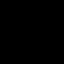

(40, 4096)


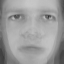

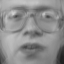

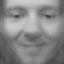

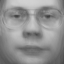

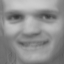

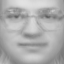

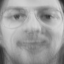

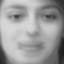

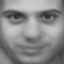

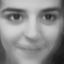

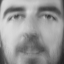

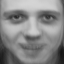

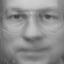

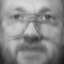

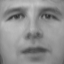

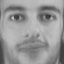

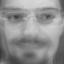

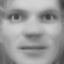

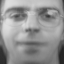

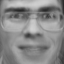

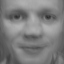

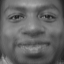

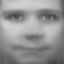

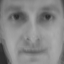

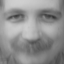

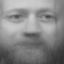

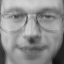

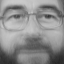

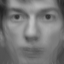

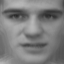

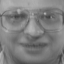

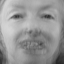

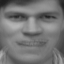

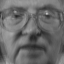

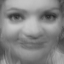

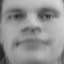

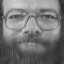

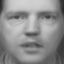

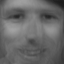

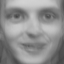

In [ ]:
lda = LDA(n_components=2)
projected = lda.fit_transform(x_train, y_train)
print(x_train.shape)
print(projected.shape)

cv2_imshow(lda.xbar_.reshape(img_height, img_width))

print(lda.means_.shape)
for i in range(N_IDENTITIES):
  cv2_imshow(lda.means_[i].reshape(img_height, img_width)*255)

<ipython-input-128-148295da15ca>:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(projected[:, 0], projected[:, 1], c=y_train, edgecolor='none', alpha=0.8, cmap=plt.cm.get_cmap('Spectral', N_IDENTITIES))


[]

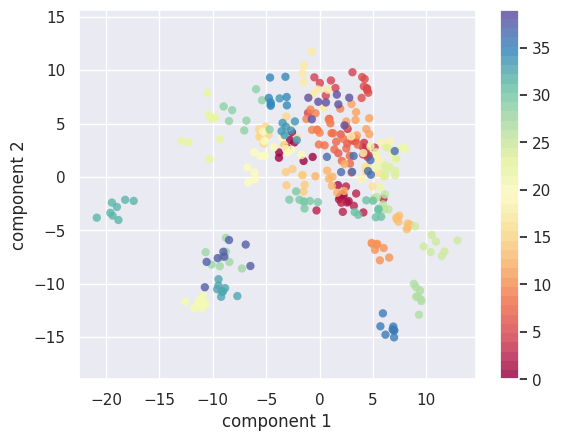

In [ ]:
# Dot diagram
plt.scatter(projected[:, 0], projected[:, 1], c=y_train, edgecolor='none', alpha=0.8, cmap=plt.cm.get_cmap('Spectral', N_IDENTITIES))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.axis('equal')
plt.colorbar()
plt.plot()

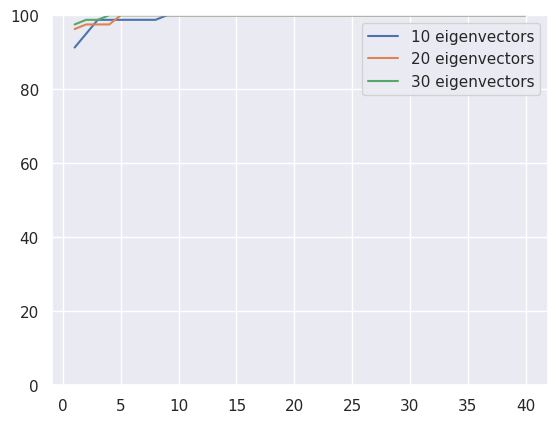

In [ ]:
# CMC plots for LDA
for i in range(10,40,10):
  lda = LDA(n_components=i)
  lda.fit(x_train.reshape(-1, img_height*img_width), y_train)

  gallery = lda.transform(x_train.reshape(-1, img_height*img_width))
  probe = lda.transform(x_test.reshape(-1, img_height*img_width))

  CMC = {}
  # For each test case
  for j in range(len(probe)):
    # Compute the distance to closest correct label.
    genuine_dist = np.inf
    for k in range(len(gallery)):
      if y_test[j] == y_train[k]:
        dist = np.sum((gallery[k]-probe[j])**2)
        if dist < genuine_dist:
          genuine_dist = dist
    # Compute number of incorrect labels closer than closest correct label.
    ids = set()
    for k in range(len(gallery)):
      if y_test[j] != y_train[k]:
        dist = np.sum((gallery[k]-probe[j])**2)
        if dist < genuine_dist:
          ids.add(y_train[k])
    # Record rank of closest correct label.
    rank=1+len(ids)
    if rank not in CMC:
      CMC[rank] = 1
    else:
      CMC[rank] += 1

  rank = []
  acc = []
  total = 0
  for j in range(1, N_IDENTITIES+1):
    if j in CMC:
      total += CMC[j]
    rank.append(j)
    acc.append(100.0*total/len(probe))

  plt.plot(rank, acc, label=str(i)+' eigenvectors')
  plt.legend()
  plt.ylim(0, 100)
  plt.plot()

Text(93.75, 0.5, 'predicted label')

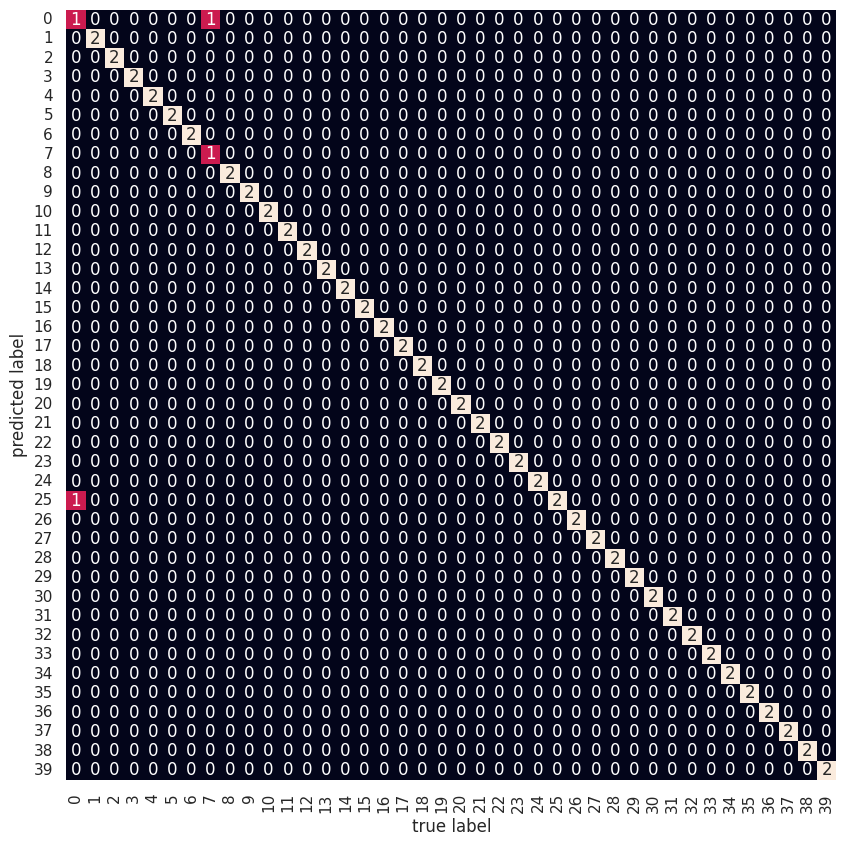

In [ ]:
# Confusion Matrix
y_predicted = lda.predict(x_test)

mat = confusion_matrix(y_test, y_predicted)
plt.figure(figsize = (10, 10))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,)
plt.xlabel('true label')
plt.ylabel('predicted label')

### **SVM**

In [ ]:
model = SVC(kernel='linear')
model.fit(x_train, y_train)

yfit = model.predict(x_test)

Text(93.75, 0.5, 'predicted label')

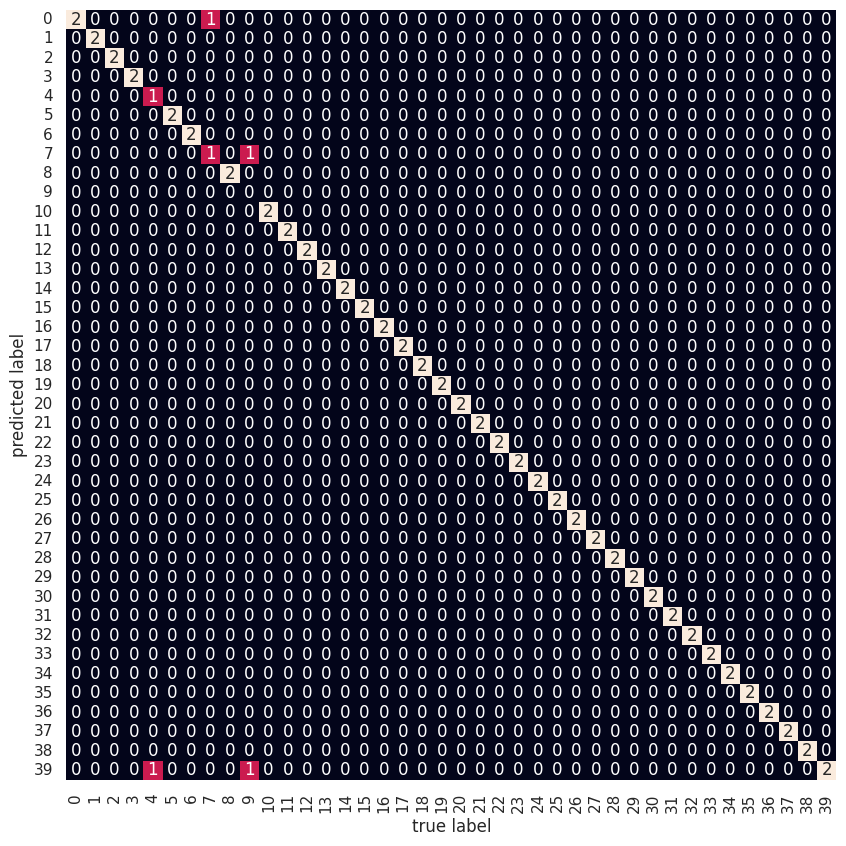

In [ ]:
# Confusion Matrix
mat = confusion_matrix(y_test, yfit)
plt.figure(figsize = (10,10))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,)
plt.xlabel('true label')
plt.ylabel('predicted label')

In [ ]:
model = SVC(kernel='linear', probability=True)
model.fit(x_train, y_train)

yfit = model.predict_proba(x_test)

print(yfit.shape)

(80, 40)


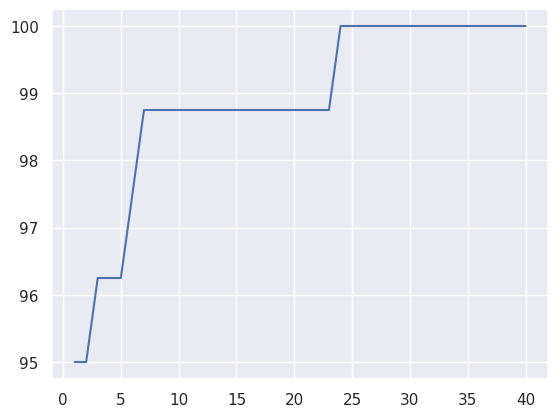

In [ ]:
# CMC plots for SVM
def plot_CMC(ysimilarity, ytarget):
  assert len(ysimilarity) == len(ytarget)
  CMC = {}
  for i in range(len(ysimilarity)):
    # get similarity for the correct class
    genuine_sim = ysimilarity[i][ytarget[i]]
    # count how many incorrect classes have higher similarity
    rank = 1
    for j, sim in enumerate(ysimilarity[i]):
      if j != ytarget[i]:
        if sim >= genuine_sim:
          rank += 1
    # save rank
    if rank not in CMC:
      CMC[rank] = 1
    else:
      CMC[rank] += 1

  # cumulative sum to create CMC
  N = []
  rankN = []
  total = 0
  for i in range(1,len(ysimilarity[0])+1):
    if i in CMC:
      total += CMC[i]
    N.append(i)
    rankN.append(100.0*total/len(ysimilarity))

  plt.plot(N, rankN)
  plt.plot()

plot_CMC(yfit, y_test)

### **CNN: LeNet-5**

In [ ]:
# Split the dataset again to train a LeNet-5 model
N_IDENTITIES = len(np.unique(faces.target)) # how many different individuals are in the dataset
GALLERY_SIZE = 8                            # use the first GALLERY_SIZE images per individual for training, the rest for testing

gallery_indices = []
probe_indices = []
for i in range(N_IDENTITIES):
  indices = list(np.where(faces.target == i)[0])
  gallery_indices += indices[:GALLERY_SIZE]
  probe_indices += indices[GALLERY_SIZE:]

x_train = faces.images[gallery_indices].reshape(-1, img_height, img_width, 1)
y_train = faces.target[gallery_indices]
x_test = faces.images[probe_indices].reshape(-1, img_height, img_width, 1)
y_test = faces.target[probe_indices]

print(x_train.shape, x_test.shape, '\n')

print(x_train.shape, y_train.shape, x_train.dtype, y_train.dtype)
print(x_test.shape, y_test.shape, '\n')

(320, 64, 64, 1) (80, 64, 64, 1) 

(320, 64, 64, 1) (320,) float32 int64
(80, 64, 64, 1) (80,) 



In [ ]:
# Create model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(filters=6, kernel_size=(5, 5), activation='relu', input_shape=(64, 64, 1)))
model.add(tf.keras.layers.MaxPool2D())
model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=(5, 5), activation='relu'))
model.add(tf.keras.layers.MaxPool2D())
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=120, activation='relu'))
model.add(tf.keras.layers.Dense(units=84, activation='relu'))
model.add(tf.keras.layers.Dense(units=40, activation = 'softmax'))

print(model.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 60, 60, 6)         156       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 30, 30, 6)         0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 26, 26, 16)        2416      
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 13, 13, 16)        0         
 g2D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 2704)              0         
                                                                 
 dense_12 (Dense)            (None, 120)              

In [ ]:
# Training parameter
learning_rate = 0.001
loss_function = 'sparse_categorical_crossentropy'
batch_size = 10
num_epochs = 50

In [ ]:
# training configuration
optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss=loss_function, metrics=['accuracy'])


#train
history = model.fit(x=x_train,y=y_train, epochs=num_epochs, batch_size=batch_size)



scores = model.evaluate(x_train, y_train, verbose=0)
print('TRAINING SET\nLoss:', scores[0], '\nAccuracy:', scores[1])

scores = model.evaluate(x_test, y_test, verbose=0)
print('\nTEST SET\nLoss:', scores[0], '\nAccuracy:', scores[1])

Epoch 1/50
32/32 [==============================] - 2s 4ms/step - loss: 3.7035 - accuracy: 0.0281
Epoch 2/50
32/32 [==============================] - 0s 4ms/step - loss: 3.6697 - accuracy: 0.0437
Epoch 3/50
32/32 [==============================] - 0s 4ms/step - loss: 3.5254 - accuracy: 0.0844
Epoch 4/50
32/32 [==============================] - 0s 4ms/step - loss: 2.8431 - accuracy: 0.2969
Epoch 5/50
32/32 [==============================] - 0s 4ms/step - loss: 1.5976 - accuracy: 0.5750
Epoch 6/50
32/32 [==============================] - 0s 4ms/step - loss: 0.7950 - accuracy: 0.8219
Epoch 7/50
32/32 [==============================] - 0s 4ms/step - loss: 0.5559 - accuracy: 0.8656
Epoch 8/50
32/32 [==============================] - 0s 4ms/step - loss: 0.3027 - accuracy: 0.9500
Epoch 9/50
32/32 [==============================] - 0s 4ms/step - loss: 0.1298 - accuracy: 0.9719
Epoch 10/50
32/32 [==============================] - 0s 4ms/step - loss: 0.0835 - accuracy: 0.9844
Epoch 11/50
32/32 [

3/3 [==============================] - 0s 5ms/step


Text(0.5, 1.0, 'Confusion Matrix')

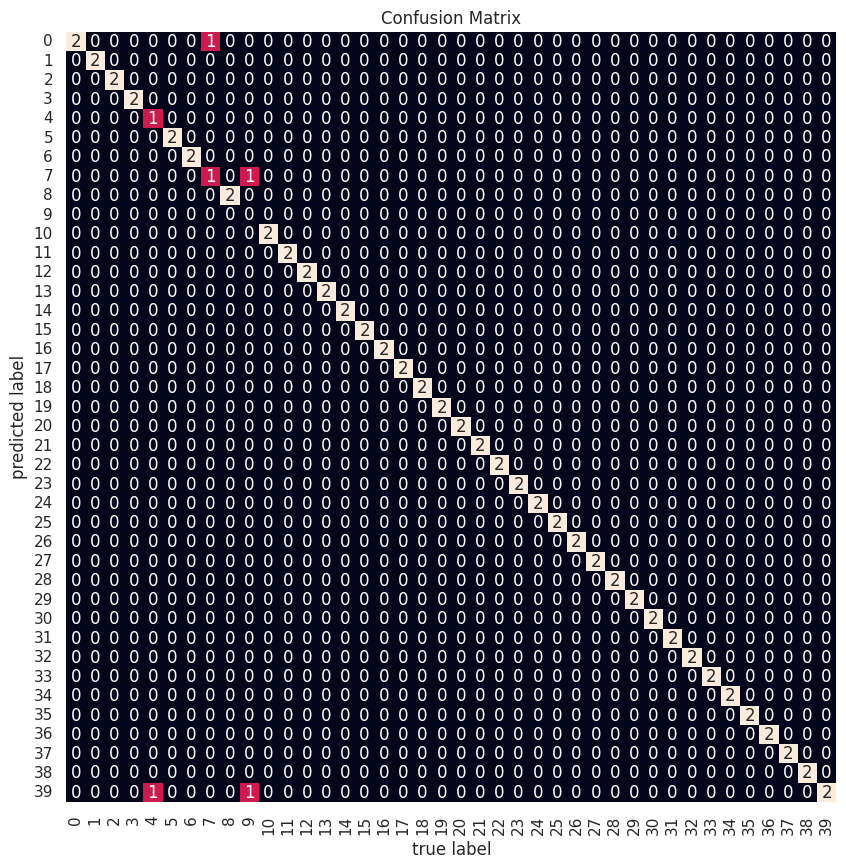

In [ ]:
# Confusion Matrix
prediction = model.predict(x_test)
pred = np.argmax(prediction, axis = 1)
mat_1 = confusion_matrix(y_test, pred)
plt.figure(figsize = (10, 10))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,)
plt.xlabel("true label")
plt.ylabel("predicted label")
plt.title('Confusion Matrix')

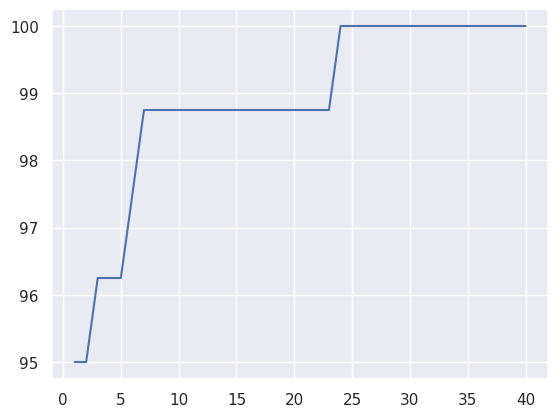

In [ ]:
# CMC plots for LeNet-5
def plot_CMC(ysimilarity, ytarget):
  assert len(ysimilarity) == len(ytarget)
  CMC = {}
  for i in range(len(ysimilarity)):
    # get similarity for the correct class
    genuine_sim = ysimilarity[i][ytarget[i]]
    # count how many incorrect classes have higher similarity
    rank = 1
    for j, sim in enumerate(ysimilarity[i]):
      if j != ytarget[i]:
        if sim >= genuine_sim:
          rank += 1
    # save rank
    if rank not in CMC:
      CMC[rank] = 1
    else:
      CMC[rank] += 1

  # cumulative sum to create CMC
  N = []
  rankN = []
  total = 0
  for i in range(1,len(ysimilarity[0])+1):
    if i in CMC:
      total += CMC[i]
    N.append(i)
    rankN.append(100.0*total/len(ysimilarity))

  plt.plot(N, rankN)
  plt.plot()

plot_CMC(yfit, y_test)

Augmentation

---


This is a repeated augmentation to show differences between each scenario.

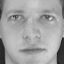

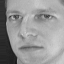

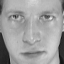

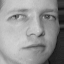

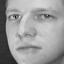

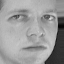

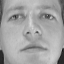

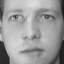

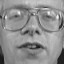

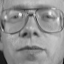

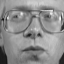

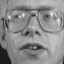

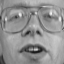

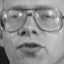

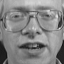

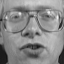

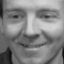

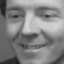

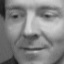

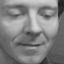

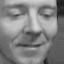

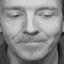

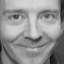

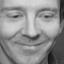

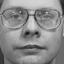

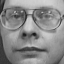

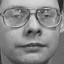

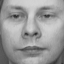

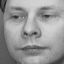

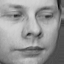

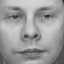

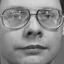

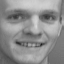

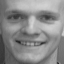

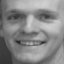

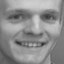

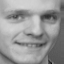

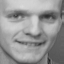

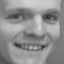

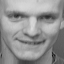

In [ ]:
# Horizontal Flip
for i in range (N_IDENTITIES):
  hflip= iaa.Fliplr(p=1.0)
  input_hf= hflip.augment_image(x_train[i].reshape(img_height, img_width)*255.0)
  cv2_imshow(input_hf)

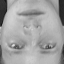

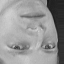

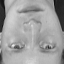

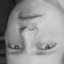

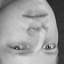

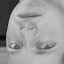

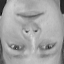

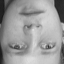

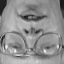

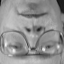

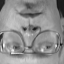

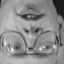

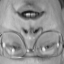

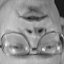

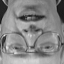

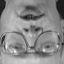

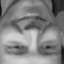

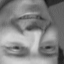

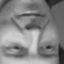

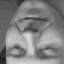

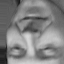

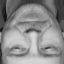

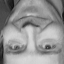

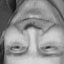

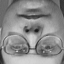

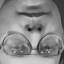

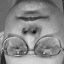

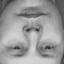

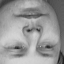

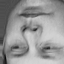

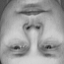

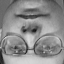

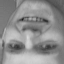

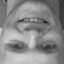

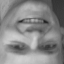

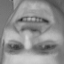

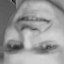

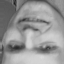

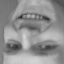

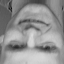

In [ ]:
#Vertical Flip
for i in range (N_IDENTITIES):
  vflip= iaa.Flipud(p=1.0)
  input_vf= vflip.augment_image(x_train[i].reshape(img_height, img_width)*255.0)
  cv2_imshow(input_vf)

# Report your results

Check these amazing plots I have below!

# IMDB Movie Review Dataset
Description from https://www.tensorflow.org/datasets/catalog/imdb_reviews:
> Large Movie Review Dataset. This is a dataset for binary sentiment classification containing substantially more data than previous benchmark datasets. We provide a set of 25,000 highly polar movie reviews for training, and 25,000 for testing. There is additional unlabeled data for use as well.

In [ ]:
import tensorflow_datasets
import numpy as np

Load dataset

In [ ]:
dataset, info = tensorflow_datasets.load('imdb_reviews', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

Get subset of the data for training and testing (2000 samples each). Convert Keras dataset to lists of strings and labels.

In [ ]:
x_train = []
y_train = []

for sample, label in train_dataset.take(2000):
  x_train.append((sample.numpy()).decode('utf-8'))
  y_train.append(label.numpy())

x_train = np.asarray(x_train)
y_train = np.asarray(y_train)

print(x_train[0])
print(y_train[0])

x_test = []
y_test = []

for sample, label in test_dataset.take(2000):
  x_test.append((sample.numpy()).decode('utf-8'))
  y_test.append(label.numpy())

x_test = np.asarray(x_test)
y_test = np.asarray(y_test)

print(x_test[0])
print(y_test[0])

This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.
0
There are films that make careers. For George Romero, it was NIGHT OF THE LIVING DEAD; for Kevin Smith, CLERKS; for Robert Rodriguez, EL MARIACHI. Add to that list Onur Tukel's absolutely amazing DING-A-LING-LESS. Flawless film-making, and as assured and as professional as any of the afo

# Preprocessing

Remove HTML strips and denoise text

In [ ]:
#Removing the html strips
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)


#Define function for removing special characters
def remove_special_characters(text, remove_digits=True):
    return re.sub('[^a-zA-z0-9\s]','',text)


#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    text = remove_special_characters(text)
    return text

# Apply function on sample column for each dataset
i = 0
for sent in x_train:
  x_train[i] = denoise_text(x_train[i]) # -- from train set
  i += 1

i = 0
for sent in x_test:
  x_test[i] = denoise_text(x_test[i]) # -- from test set
  i += 1

print(x_train[0])
print(y_train[0])

<ipython-input-87-d2e2a66cb4e9>:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


This was an absolutely terrible movie Dont be lured in by Christopher Walken or Michael Ironside Both are great actors but this must simply be their worst role in history Even their great acting could not redeem this movies ridiculous storyline This movie is an early nineties US propaganda piece The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions Maria Conchita Alonso appeared phony and her pseudolove affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning I am disappointed that there are movies like this ruining actors like Christopher Walkens good name I could barely sit through it
0


Introduce tokenization and remove stop words

In [ ]:
# set tokenizer
tokenizer=ToktokTokenizer()

#Setting English stopwords
stopword_list=nltk.corpus.stopwords.words('english')

#set stopwords to english
stop=set(stopwords.words('english'))
print(stop)

#removing the stopwords
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)
    return filtered_text

#Apply function on sample column for each dataset
i = 0
for sent in x_train:
  x_train[i] = remove_stopwords(x_train[i]) # remove stop words from train set
  i += 1

i = 0
for sent in x_test:
  x_test[i] = remove_stopwords(x_test[i]) # remove stop words from test set
  i += 1

{'shan', 'yourselves', 'yours', 'both', 'now', 'didn', "mustn't", "you'll", 'him', 'ourselves', 'of', 'isn', 'under', 'because', 'does', 'after', 'above', 'from', 'off', 'not', 'them', 'should', 'for', 'too', 'have', 'if', 'your', 'theirs', 'be', 'do', 'no', 's', 'hadn', 'some', 'other', 'having', 'haven', 'further', "needn't", 'below', 'there', 're', 'doing', 'so', 'd', 'herself', "don't", 'own', 'yourself', 'm', 've', 'and', 'my', 'you', 'don', 'any', 'but', "mightn't", 'a', 'weren', "won't", 'we', 'into', 'just', 'hasn', "weren't", 'myself', 'through', 'itself', 'these', 'their', 'are', 'to', 'by', "isn't", 'won', 'i', 'her', 'over', 'very', 'mightn', 'our', 'ours', 'up', 'then', 'been', 'he', 'hers', 'at', 'down', 'being', "shan't", "you're", 'until', 'such', "wouldn't", 'once', "you'd", 'will', 'they', 'couldn', "hadn't", 'an', 'll', 'has', 'why', 'few', 'what', 'with', 'o', 'how', 'this', 'against', 'those', 'y', "should've", "aren't", 'that', "haven't", 'while', 'or', 'on', 'who

# Baseline (Naive Bayes)

Here is the code for my baseline, along with an explanation of how it works and why it makes sense for this problem.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import sklearn.naive_bayes

def sentimentClassifier(x_train, y_train, x_test):
  vector = CountVectorizer()
  gnb = sklearn.naive_bayes.GaussianNB()
  x_train_vectorized = vector.fit_transform(x_train).toarray() # learn vocab of reviews and return vectorized matrix
  gnb.fit(x_train_vectorized, y_train) # fit data with Naive Bayes Classifier
  return gnb.predict(vector.transform(x_test).toarray()) # Make prediction based on learned vocab and fit data

def accuracy(prediction, y_test): # Calculated by comparing prediction array and y_test array for similarities
  accuracy = 0
  for i in range(len(y_test)):
    if prediction[i] == y_test[i]:
      accuracy += 1
  accuracy /= len(y_test)
  return accuracy

# Test Accuracy
prediction = sentimentClassifier(x_train, y_train, x_test) # us NB classifier to make prediction
print("Accuracy: ", accuracy(prediction, y_test))

# Test Accuracy by Sentence
i = 0
sentence = x_test[i]
print("\nSentence: ", sentence)
prediction = sentimentClassifier(x_train, y_train, [x_test[i]])
print("Sentiment: ", prediction[0])

'''
Summary:
  My baseline uses a Guassian Naive Bayes classifier along with a count vectorizer
    to perform sentiment classification.
  This baseline makes sense bc it shows the kind of accuracy we can get by applying a
  simple bag-of-words representation to each word. Compared to the word embeddings
  we'll see being used later by our RNN.
'''

Accuracy:  0.602

Sentence:  films make careers George Romero NIGHT LIVING DEAD Kevin Smith CLERKS Robert Rodriguez EL MARIACHI Add list Onur Tukels absolutely amazing DINGALINGLESS Flawless filmmaking assured professional aforementioned movies havent laughed hard since saw FULL MONTY even dont think laughed quite hard speak Tukels talent considerable DINGALINGLESS chock full double entendres one would sit copy script linebyline examination fully appreciate uh breadth width Every shot beautifully composed clear sign surehanded director performances around solid theres none overthetop scenery chewing one mightve expected film like DINGALINGLESS film whose time come
Sentiment:  1


'\nSummary:\n  My baseline uses a Guassian Naive Bayes classifier along with a count vectorizer\n    to perform sentiment classification.\n'

# Vanilla RNN

In [ ]:
import tensorflow as tf

# Set max input
max_words = 1000
# Initiate vectorizer
vectorize_layer = tf.keras.layers.TextVectorization(max_tokens=max_words)
# Learn the vocabulary of the x_train and give each "word" a unique number ID.
vectorize_layer.adapt(x_train)

In [ ]:
# Initiate the model
model = tf.keras.Sequential([
    vectorize_layer,
    tf.keras.layers.Embedding(input_dim=max_words, output_dim=64, mask_zero=True),
    tf.keras.layers.SimpleRNN(64),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
# Train the model
model.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=tf.keras.optimizers.Adam(1e-4), metrics=['accuracy'])

history = model.fit(x=x_train, y=y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/10
32/32 [==============================] - 56s 1s/step - loss: 0.6932 - accuracy: 0.5160 - val_loss: 0.6923 - val_accuracy: 0.5130
Epoch 2/10
32/32 [==============================] - 28s 875ms/step - loss: 0.6829 - accuracy: 0.5825 - val_loss: 0.6921 - val_accuracy: 0.5140
Epoch 3/10
32/32 [==============================] - 28s 890ms/step - loss: 0.6741 - accuracy: 0.6260 - val_loss: 0.6928 - val_accuracy: 0.5185
Epoch 4/10
32/32 [==============================] - 29s 907ms/step - loss: 0.6625 - accuracy: 0.6680 - val_loss: 0.6934 - val_accuracy: 0.5100
Epoch 5/10
32/32 [==============================] - 26s 828ms/step - loss: 0.6473 - accuracy: 0.6955 - val_loss: 0.6946 - val_accuracy: 0.5280
Epoch 6/10
32/32 [==============================] - 25s 772ms/step - loss: 0.6304 - accuracy: 0.7290 - val_loss: 0.6967 - val_accuracy: 0.5210
Epoch 7/10
32/32 [==============================] - 27s 836ms/step - loss: 0.6033 - accuracy: 0.7510 - val_loss: 0.7002 - val_accuracy: 0.5180
Ep

# Vanilla RNN plots

Check these amazing plots I have below!

(0.0, 0.7658607631921768)

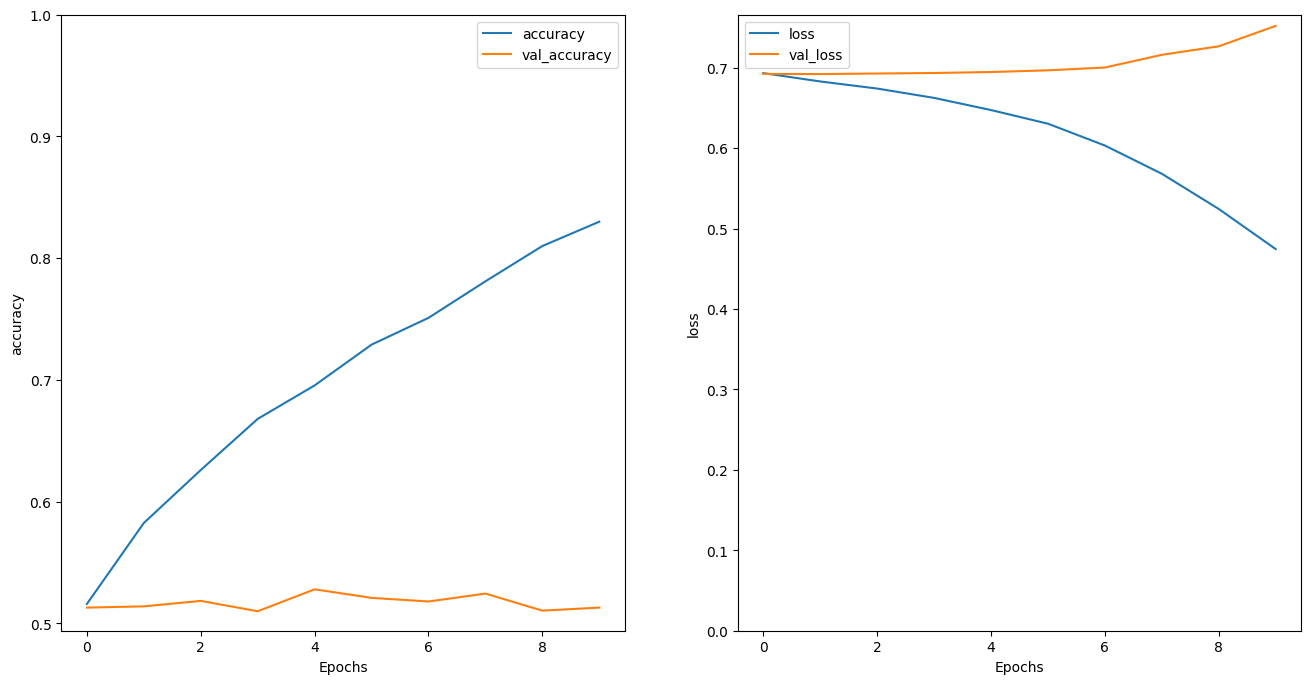

In [ ]:
import matplotlib.pyplot as plt

def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plot_graphs(history, 'accuracy')
plt.ylim(None, 1)
plt.subplot(1, 2, 2)
plot_graphs(history, 'loss')
plt.ylim(0, None)

# **Data Augmentation For IMDB Dataset**

Imports

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize.toktok import ToktokTokenizer
from bs4 import BeautifulSoup
from IPython.display import clear_output
import re


nltk.download("all-corpora")
clear_output()

Load Dataset

In [ ]:
import tensorflow_datasets
import numpy as np

dataset, info = tensorflow_datasets.load('imdb_reviews', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

# **Baseline (Naive Bayes) w\ Data Augmentation**

Split Datasets

In [ ]:
x_train = []
y_train = []

for sample, label in train_dataset.take(2000):
  x_train.append((sample.numpy()).decode('utf-8'))
  y_train.append(label.numpy())

x_train = np.asarray(x_train)
y_train = np.asarray(y_train)

print(x_train[0])
print(y_train[0])

x_test = []
y_test = []

for sample, label in test_dataset.take(2000):
  x_test.append((sample.numpy()).decode('utf-8'))
  y_test.append(label.numpy())

x_test = np.asarray(x_test)
y_test = np.asarray(y_test)

print(x_test[0])
print(y_test[0])

print("x_train shape: ", x_train.shape)

This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.
0
There are films that make careers. For George Romero, it was NIGHT OF THE LIVING DEAD; for Kevin Smith, CLERKS; for Robert Rodriguez, EL MARIACHI. Add to that list Onur Tukel's absolutely amazing DING-A-LING-LESS. Flawless film-making, and as assured and as professional as any of the afo

# Preprocessing

Remove HTML and strip noisy text

In [ ]:
#Removing the html strips
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)


#Define function for removing special characters
def remove_special_characters(text, remove_digits=True):
    return re.sub('[^a-zA-z0-9\s]','',text)


#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    text = remove_special_characters(text)
    return text

# Apply function on sample column for each dataset
i = 0
for sent in x_train:
  x_train[i] = denoise_text(x_train[i]) # -- from train set
  i += 1

i = 0
for sent in x_test:
  x_test[i] = denoise_text(x_test[i]) # -- from test set
  i += 1

clear_output()
print(x_train[0])
print(y_train[0])
print(x_test[0])
print(y_test[0])

<ipython-input-97-d2e2a66cb4e9>:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


This was an absolutely terrible movie Dont be lured in by Christopher Walken or Michael Ironside Both are great actors but this must simply be their worst role in history Even their great acting could not redeem this movies ridiculous storyline This movie is an early nineties US propaganda piece The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions Maria Conchita Alonso appeared phony and her pseudolove affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning I am disappointed that there are movies like this ruining actors like Christopher Walkens good name I could barely sit through it
0


# Data Augmentation


Senetences are cut and then partially regenerated using text generation with distilgpt2 model.

This takes a very long time!! (30 minutes on V100)

In [ ]:
from transformers import pipeline
generator = pipeline('text-generation', model='distilgpt2')

In [ ]:
def augment_text(text):
  text_length = len(text.split())
  num_new_words = 20
  output_length = text_length + num_new_words
  gpt_output = generator(text, max_length=output_length, num_return_sequences=5)
  augmented_text = gpt_output[0]['generated_text']
  return augmented_text

#Apply function on sample column for each dataset
i = 0
for sent in x_train:
  length = int(len(sent.split())/6)
  smallLength = int(length/5)
  sent = sent.split()
  sent = sent[smallLength:length] # only take first 1/6th of words, and leave out the first couple of words
  sent = " ".join(sent)

  print(i)
  x_train = np.append(x_train, augment_text(sent)) # adding augmented data to train set
  y_train = np.append(y_train, [y_train[i]]) # add label for augmented sentence

  if i < 800: # stop iterating after 800 new rows have been added
    break
  i += 1


clear_output()
print(x_train.shape)
print(y_train.shape)

(2801,)
(2801,)


**More Preprocessing**

Tokenizing and removing stop words

In [ ]:
# set tokenizer
tokenizer=ToktokTokenizer()

#Setting English stopwords
stopword_list=nltk.corpus.stopwords.words('english')

#set stopwords to english
stop=set(stopwords.words('english'))
print(stop)

#removing the stopwords
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)
    return filtered_text

#Apply function on sample column for each dataset
i = 0
for sent in x_train:
  x_train[i] = remove_stopwords(x_train[i]) # remove stop words from train set
  i += 1

i = 0
for sent in x_test:
  x_test[i] = remove_stopwords(x_test[i]) # remove stop words from test set
  i += 1

print(x_train[0])
print(y_train[0])
print(x_test[0])
print(y_test[0])

{'shan', 'yourselves', 'yours', 'both', 'now', 'didn', "mustn't", "you'll", 'him', 'ourselves', 'of', 'isn', 'under', 'because', 'does', 'after', 'above', 'from', 'off', 'not', 'them', 'should', 'for', 'too', 'have', 'if', 'your', 'theirs', 'be', 'do', 'no', 's', 'hadn', 'some', 'other', 'having', 'haven', 'further', "needn't", 'below', 'there', 're', 'doing', 'so', 'd', 'herself', "don't", 'own', 'yourself', 'm', 've', 'and', 'my', 'you', 'don', 'any', 'but', "mightn't", 'a', 'weren', "won't", 'we', 'into', 'just', 'hasn', "weren't", 'myself', 'through', 'itself', 'these', 'their', 'are', 'to', 'by', "isn't", 'won', 'i', 'her', 'over', 'very', 'mightn', 'our', 'ours', 'up', 'then', 'been', 'he', 'hers', 'at', 'down', 'being', "shan't", "you're", 'until', 'such', "wouldn't", 'once', "you'd", 'will', 'they', 'couldn', "hadn't", 'an', 'll', 'has', 'why', 'few', 'what', 'with', 'o', 'how', 'this', 'against', 'those', 'y', "should've", "aren't", 'that', "haven't", 'while', 'or', 'on', 'who

# Implementation

Train and test for accuracy

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import sklearn.naive_bayes

def sentimentClassifier(x_train, y_train, x_test):
  vector = CountVectorizer()
  gnb = sklearn.naive_bayes.GaussianNB()
  x_train_vectorized = vector.fit_transform(x_train).toarray() # learn vocab of reviews and return vectorized matrix
  gnb.fit(x_train_vectorized, y_train) # fit data with Naive Bayes Classifier
  return gnb.predict(vector.transform(x_test).toarray()) # Make prediction based on learned vocab and fit data

def accuracy(prediction, y_test): # Calculated by comparing prediction array and y_test array for similarities
  accuracy = 0
  for i in range(len(y_test)):
    if prediction[i] == y_test[i]:
      accuracy += 1
  accuracy /= len(y_test)
  return accuracy

# Test Accuracy
prediction = sentimentClassifier(x_train, y_train, x_test) # us NB classifier to make prediction
print("Accuracy: ", accuracy(prediction, y_test))

# Test Accuracy by Sentence
i = 0
sentence = x_test[i]
print("\nSentence: ", sentence)
prediction = sentimentClassifier(x_train, y_train, [x_test[i]])
print("Sentiment: ", prediction[0])

'''
Summary:
  My baseline uses a Guassian Naive Bayes classifier along with a count vectorizer
    to perform sentiment classification.
  Data augmentation:
    - creating sentences with text generation, and appending them to the training set (bootstrapping)
  Preprocessing:
    - removing stop words
    - removing special characters
    - removing html strips
    - override tokenizer with ToktokTokenizer

  We se a slight increase in accuracy after these changes.
'''

Accuracy:  0.6025

Sentence:  films make careers George Romero NIGHT LIVING DEAD Kevin Smith CLERKS Robert Rodriguez EL MARIACHI Add list Onur Tukels absolutely amazing DINGALINGLESS Flawless filmmaking assured professional aforementioned movies havent laughed hard since saw FULL MONTY even dont think laughed quite hard speak Tukels talent considerable DINGALINGLESS chock full double entendres one would sit copy script linebyline examination fully appreciate uh breadth width Every shot beautifully composed clear sign surehanded director performances around solid theres none overthetop scenery chewing one mightve expected film like DINGALINGLESS film whose time come
Sentiment:  1


'\nSummary:\n  My baseline uses a Guassian Naive Bayes classifier along with a count vectorizer\n    to perform sentiment classification.\n  Data augmentation is implemented in the form of data preprocessing:\n    - removing stop words\n    - removing special characters\n    - removing html strips\n    - override tokenizer with ToktokTokenizer\n\n  We se a slight increase in accuracy after these changes.\n'

# RNN w\ Data Augmentation

Using the exact same dataset as our baseline

Load Dataset

In [ ]:
#dataset, info = tensorflow_datasets.load('imdb_reviews', with_info=True, as_supervised=True)
#train_dataset, test_dataset = dataset['train'], dataset['test']

Split Datasets

In [ ]:
'''
x_train = []
y_train = []

for sample, label in train_dataset.take(2000):
  x_train.append(sample.numpy())
  y_train.append(label.numpy())

x_train = np.asarray(x_train)
y_train = np.asarray(y_train)

print(x_train[0])
print(y_train[0])

x_test = []
y_test = []

for sample, label in test_dataset.take(2000):
  x_test.append(sample.numpy())
  y_test.append(label.numpy())

x_test = np.asarray(x_test)
y_test = np.asarray(y_test)

print(x_test[0])
print(y_test[0])
'''

'\nx_train = []\ny_train = []\n\nfor sample, label in train_dataset.take(2000):\n  x_train.append(sample.numpy())\n  y_train.append(label.numpy())\n\nx_train = np.asarray(x_train)\ny_train = np.asarray(y_train)\n\nprint(x_train[0])\nprint(y_train[0])\n\nx_test = []\ny_test = []\n\nfor sample, label in test_dataset.take(2000):\n  x_test.append(sample.numpy())\n  y_test.append(label.numpy())\n\nx_test = np.asarray(x_test)\ny_test = np.asarray(y_test)\n\nprint(x_test[0])\nprint(y_test[0])\n'

# Preproccessing

Tokenize data and remove stop words

In [ ]:
'''
# set tokenizer
tokenizer=ToktokTokenizer()

#Setting English stopwords
stopword_list=nltk.corpus.stopwords.words('english')

#set stopwords to english
stop=set(stopwords.words('english'))
print(stop)

#removing the stopwords
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)
    return filtered_text

#Apply function on sample column for each dataset
i = 0
for sent in x_train:
  x_train[i] = remove_stopwords(x_train[i]) # remove stop words from train set
  i += 1

i = 0
for sent in x_test:
  x_test[i] = remove_stopwords(x_test[i]) # remove stop words from test set
  i += 1
'''

"\n# set tokenizer\ntokenizer=ToktokTokenizer()\n\n#Setting English stopwords\nstopword_list=nltk.corpus.stopwords.words('english')\n\n#set stopwords to english\nstop=set(stopwords.words('english'))\nprint(stop)\n\n#removing the stopwords\ndef remove_stopwords(text, is_lower_case=False):\n    tokens = tokenizer.tokenize(text)\n    tokens = [token.strip() for token in tokens]\n    if is_lower_case:\n        filtered_tokens = [token for token in tokens if token not in stopword_list]\n    else:\n        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]\n    filtered_text = ' '.join(filtered_tokens)\n    return filtered_text\n\n#Apply function on sample column for each dataset\ni = 0\nfor sent in x_train:\n  x_train[i] = remove_stopwords(x_train[i]) # remove stop words from train set\n  i += 1\n\ni = 0\nfor sent in x_test:\n  x_test[i] = remove_stopwords(x_test[i]) # remove stop words from test set\n  i += 1\n"

HTML parsing

In [ ]:
'''
#Removing the html strips
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Apply function on sample column for each dataset
i = 0
for sent in x_train:
  x_train[i] = strip_html(x_train[i]) # remove stop words from train set
  i += 1

i = 0
for sent in x_test:
  x_test[i] = strip_html(x_test[i]) # remove stop words from test set
  i += 1
  '''

'\n#Removing the html strips\ndef strip_html(text):\n    soup = BeautifulSoup(text, "html.parser")\n    return soup.get_text()\n\n#Apply function on sample column for each dataset\ni = 0\nfor sent in x_train:\n  x_train[i] = strip_html(x_train[i]) # remove stop words from train set\n  i += 1\n\ni = 0\nfor sent in x_test:\n  x_test[i] = strip_html(x_test[i]) # remove stop words from test set\n  i += 1\n  '

Initiate and run model

In [ ]:
import tensorflow as tf

# Set max input
max_words = 1000
# Initiate vectorizer
vectorize_layer = tf.keras.layers.TextVectorization(max_tokens=max_words)
# Learn the vocabulary of the x_train and give each "word" a unique number ID.
vectorize_layer.adapt(x_train)

In [ ]:
# Initiate the model
model = tf.keras.Sequential([
    vectorize_layer,
    tf.keras.layers.Embedding(input_dim=max_words, output_dim=64, mask_zero=True),
    tf.keras.layers.SimpleRNN(64),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
# Train the model (it doesn't like the denoising apparently)
model.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=tf.keras.optimizers.Adam(1e-4), metrics=['accuracy'])

history = model.fit(x=x_train, y=y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/10
44/44 [==============================] - 39s 823ms/step - loss: 0.6956 - accuracy: 0.4966 - val_loss: 0.6941 - val_accuracy: 0.4985
Epoch 2/10
44/44 [==============================] - 43s 991ms/step - loss: 0.6872 - accuracy: 0.5573 - val_loss: 0.6939 - val_accuracy: 0.5025
Epoch 3/10
44/44 [==============================] - 59s 1s/step - loss: 0.6801 - accuracy: 0.6155 - val_loss: 0.6933 - val_accuracy: 0.5045
Epoch 4/10
44/44 [==============================] - 42s 964ms/step - loss: 0.6721 - accuracy: 0.6430 - val_loss: 0.6924 - val_accuracy: 0.5090
Epoch 5/10
44/44 [==============================] - 33s 743ms/step - loss: 0.6615 - accuracy: 0.6790 - val_loss: 0.6942 - val_accuracy: 0.5135
Epoch 6/10
44/44 [==============================] - 32s 708ms/step - loss: 0.6478 - accuracy: 0.6951 - val_loss: 0.6870 - val_accuracy: 0.5475
Epoch 7/10
44/44 [==============================] - 32s 722ms/step - loss: 0.6227 - accuracy: 0.7337 - val_loss: 0.6682 - val_accuracy: 0.6045
Ep

# RNN w\Data Augmentation Plots

(0.0, 0.7079201743006707)

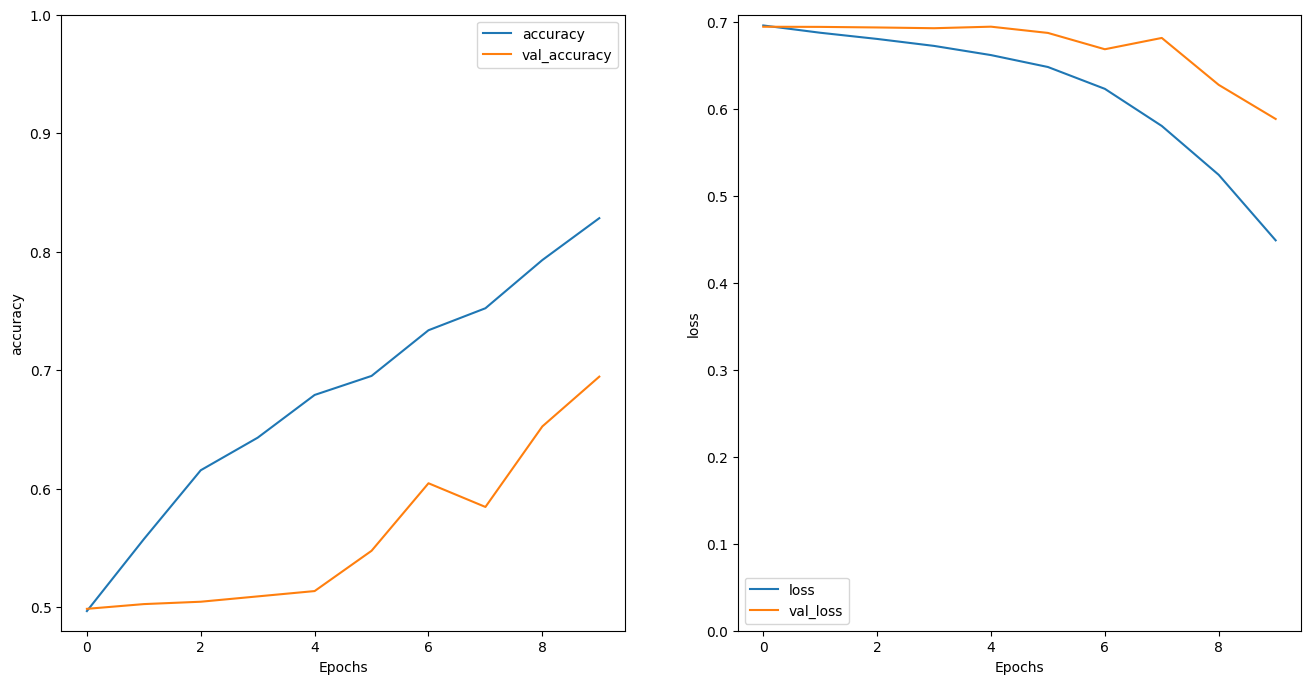

In [ ]:
def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plot_graphs(history, 'accuracy')
plt.ylim(None, 1)
plt.subplot(1, 2, 2)
plot_graphs(history, 'loss')
plt.ylim(0, None)

# **Discicussion**
Facial Recognition
1.   Is LeNet-5 better than PCA/LDA/SVM?
2.   Is there a clear difference in performance for different train/test data splits?
3.   Does data augmentation improve the results?

Text Classification
1.   Is the vanilla RNN better than a simple baseline?
2.   How sensitive is the RNN performance to hyperparameter selection?
3.   Does data augmentation improve the results? More or less than for the facial recognition task? What properties of the two tasks do you think is leading to the data augmentation effects you are seeing?

**Facial Recognition**

1.   Yes and no. LeNet-5 is one kind of deep learning architecture that has shown promise in image classification applications. PCA, LDA, and SVM are all machine learning techniques that can be applied to image classification problems. Each has advantages and disadvantages of its own, and the best method to choose will rely on the particular picture categorization task at hand.

  Based on the CMC curves for each scenario, LeNet-5 doesn't do significantly better than PCA, LDA, or SVM in the splits 80-20 and 50-50. However, it does become better in the 80-20 scenario.

2.   Yes, variations in the performance are evident across different train/test data splits. The quality of the data used to train and test a model has an impact on its performance. Variations in the train/test split will probably affect the model's performance. Due to variations in the data utilized for training and testing, various train/test splits may provide different results. For instance, if one split contains more outliers or noise compared to another, the accuracy of the model trained on that split may have lower accuracy. Hence, the selection of an appropriate split is crucial to ensure an accurate representation of the underlying data.

3.   By increasing the amount of data available for training, data augmentation improves the dataset and thus improves the performance of machine learning models. This can lead to better generalization performance, as the model has seen more examples of the data. Additionally, data augmentation ensures that the model meets a wider variety of data points by reducing overfitting.


**Text Classification**

1. Yes and no.

    When using the **non-augmented dataset**, the vanilla RNN actually performs worse than the baseline when comparing validation accuracy (accuracy based on test set predictions). The baseline, which is a Naive Bayes classifier, has around a 60% val_accuracy- while the RNN has around 52% val_accuracy after training.

    When using the **augmented dataset**, the vanilla RNN performs better than the baseline in terms of validation accuracy. 60% val_accuracy on the NB classifier, and 70% val_accuracy on the RNN after training.



2. The RNN's performance *is sensitive* to hyperparameter selection. As was noticed during preprocessing data, I had to be very careful with how I was handling the data with the RNN. A technique that ideally aids the model in its training steps can also easily make the outcome after training worse if it's not implemented *cleanly*.
More evidentally, changing learning rate even slightly caused, devistating effects on the resulting accuracy of the trained model.


3. As stated in answer 1. the augmentation DID improve our results. Especially for validation accuracy. It didn't improve quite as much as the image recognition model, but it did improve in a similar way.

    I think the properties of the two tasks leading to the increase in accuracy that we're seeing is that we're appending slightly different versions of the same data to our train sets. This allows the models to better generalize the data, and thus do much better when evaluating the test sets (due to reduction in overfitting).